In [80]:
# for analysis
import pandas as pd
import numpy as np

# for visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# extra
import warnings
warnings.filterwarnings(action="ignore")

In [81]:
# Reading the data
leads=pd.read_csv("Leads.csv")

In [82]:
# Checking first 5 rows of dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [83]:
# checking shape of dataset
leads.shape

(9240, 37)

In [84]:
# Checking basic statistics of data
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [85]:
# checking basic info of dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning

In [86]:
# Removing Id values since they are unique for everyone
leads1=leads.drop(['Prospect ID','Lead Number'],axis=1)
leads1.shape

(9240, 35)

### Missing Value Treatment

**Approach followed:**
1. Dropping columns with missing values greater than 40%
2. Imputing numerical and categorical columns with missing values less than 10% with their median and mode respectively
3. For rest columns since dropping the column will cause a good amount of information loss and imputing them with median/mode might exaggerate the data, imputed them with not specified/missing/unknown 

In [87]:
# Checking columns containing entry Select
for col in leads1.columns:
    if leads1[col].astype(str).str.contains("Select").any():
        print(col)

Specialization
How did you hear about X Education
Lead Profile
City


In [88]:
# Converting Select values to nan
leads1['Specialization'] = leads1['Specialization'].replace("Select", np.nan)
leads1['How did you hear about X Education'] = leads1['How did you hear about X Education'].replace("Select", np.nan)
leads1['Lead Profile'] = leads1['Lead Profile'].replace("Select", np.nan)
leads1['City'] = leads1['City'].replace("Select", np.nan)

In [89]:
# Checking null values again
leads1_null1=(leads1.isnull().mean())*100
leads1_null1

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [90]:
# Filtering out columns with missing value percentage greater than 40
leads1_drop1=leads1_null1[leads1_null1>40]
leads1_drop_column=list(leads1_drop1.index)
leads1_drop1

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [91]:
# Dropping the columns with missing value percentage greater than 40
leads1.drop(leads1_drop_column, axis=1, inplace=True)

In [92]:
# Checking null values again
leads1_null1=(leads1.isnull().mean())*100
leads1_null1

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [93]:
## Also from business prospective, since X Education sells online cources it will not affect the convertion rate much, 
## hence we can drop them
leads1.drop(["Country","City"], axis=1, inplace=True)

### Handling missing values of Specialization Column

In [94]:
## Checking value counts
(leads1.Specialization.value_counts(normalize=True,dropna=False)*100)

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [95]:
## Since Specialization of potential customers could be un-known, we can assign Nan values as unknown
leads1["Specialization"].fillna("Unknown",inplace=True)

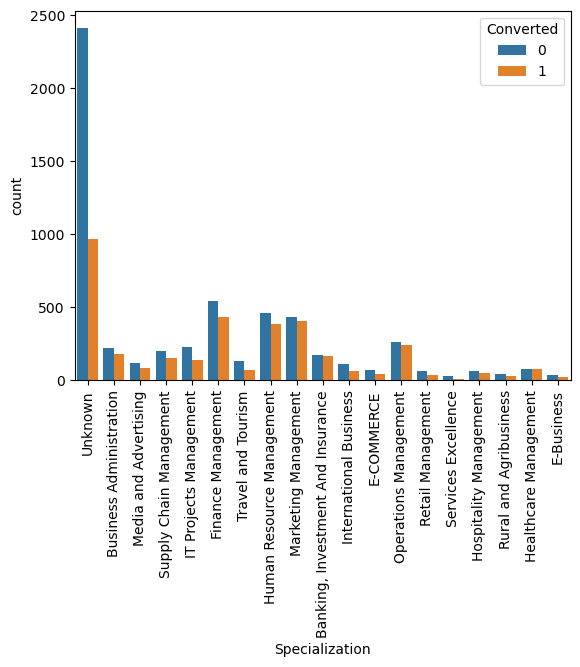

In [96]:
# Plotting the counts of Specialization for converted and non-converted leads
sns.countplot(data=leads1, x="Specialization",hue="Converted")
plt.xticks(rotation=90)
plt.show()

**Since specialization column has a large no. of unique values it will be good to combine unique values having very less % of counts for sake of simplicity**

In [97]:
## creating a new column Specialization_new and combining all unique values with very less % of counts
leads1["Specialization_new"]=np.where(leads1["Specialization"].isin(["Unknown","Finance Management","Human Resource Management","Marketing Management","Operations Management","Business Administration","IT Projects Management","Supply Chain Management","Banking, Investment And Insurance","Travel and Tourism","Media and Advertising"]),leads1["Specialization"],"Other_specializations")

In [98]:
# Checking value counts of Specialization_new column
(leads1.Specialization_new.value_counts(normalize=True,dropna=False))*100

Unknown                              36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Other_specializations                 9.015152
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
Name: Specialization_new, dtype: float64

In [99]:
## Dropping the specialization column
leads1.drop(["Specialization"],axis=1,inplace=True)

### Handling missing values of What is your current occupation Column

In [100]:
## Checking value counts
(leads1["What is your current occupation"].value_counts(normalize=True, dropna=False)*100)

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [101]:
## Imputing missing values of What is your current occupation with Not_specified
leads1["What is your current occupation"].fillna("Not_specified",inplace=True)

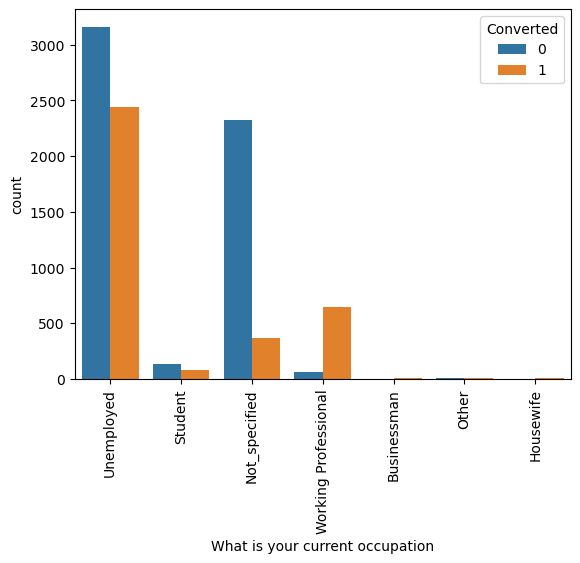

In [102]:
# Plotting the counts of What is your current occupation for converted and non-converted leads
sns.countplot(data=leads1, x="What is your current occupation",hue="Converted")
plt.xticks(rotation=90)
plt.show()

**Since What is your current occupation column has a large no. of unique values it will be good to combine unique values having very less % of counts for sake of simplicity**

In [103]:
## creating a new column What is your current occupation 1 and combining all unique values with very less % of counts
leads1["What is your current occupation 1"]=np.where(leads1["What is your current occupation"].isin(["Unemployed","Not_specified","Working Professional","Student"]),leads1["What is your current occupation"],"Other_occup")

In [104]:
## checking unique value percentage of  What is your current occupation 1 column
(leads1["What is your current occupation 1"].value_counts(normalize=True,dropna=False)*100)

Unemployed              60.606061
Not_specified           29.112554
Working Professional     7.640693
Student                  2.272727
Other_occup              0.367965
Name: What is your current occupation 1, dtype: float64

In [105]:
## Dropping the What is your current occupation column
leads1.drop(["What is your current occupation"],axis=1,inplace=True)

### Handling missing values of What matters most to you in choosing a course Column

In [106]:
## Checking value counts
(leads1["What matters most to you in choosing a course"].value_counts(normalize=True, dropna=False)*100)

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [107]:
## Imputing missing values of What matters most to you in choosing a course with Not_specified
leads1["What matters most to you in choosing a course"].fillna("Not_specified",inplace=True)

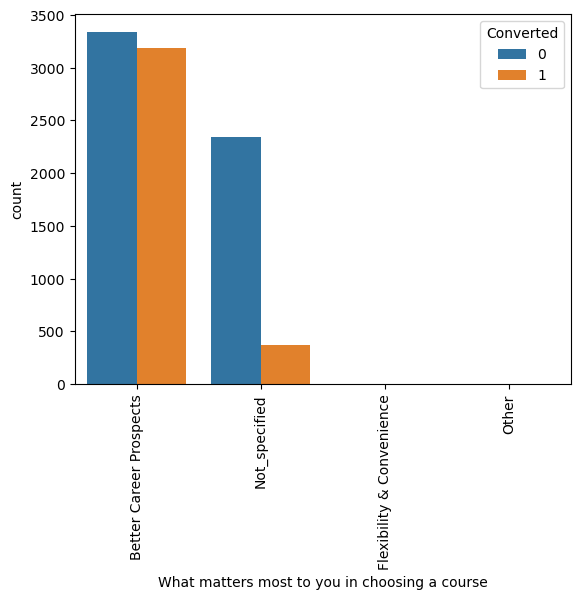

In [108]:
# Plotting the counts of What matters most to you in choosing a course for converted and non-converted leads
sns.countplot(data=leads1, x="What matters most to you in choosing a course",hue="Converted")
plt.xticks(rotation=90)
plt.show()

**Since What matters most to you in choosing a course has a large no. of unique values it will be good to combine unique values having very less % of counts for sake of simplicity**

In [109]:
## creating a new column What matters most to you in choosing a course new and combining all unique values with very less % of counts
leads1["What matters most to you in choosing a course new"]=np.where(leads1["What matters most to you in choosing a course"].isin(["Better Career Prospects","Not_specified"]),leads1["What matters most to you in choosing a course"],"Other_reasons")

In [110]:
## checking unique value percentage of What matters most to you in choosing a course 1 column
(leads1["What matters most to you in choosing a course new"].value_counts(normalize=True,dropna=False)*100)

Better Career Prospects    70.649351
Not_specified              29.318182
Other_reasons               0.032468
Name: What matters most to you in choosing a course new, dtype: float64

In [111]:
## Dropping the What matters most to you in choosing a course column
leads1.drop(["What matters most to you in choosing a course"],axis=1,inplace=True)

### Handling missing values of Tags Column

In [112]:
## Checking value counts
(leads1["Tags"].value_counts(normalize=True, dropna=False)*100)

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [113]:
## Imputing missing values of Tags with Unknown
leads1["Tags"].fillna("Unknown",inplace=True)

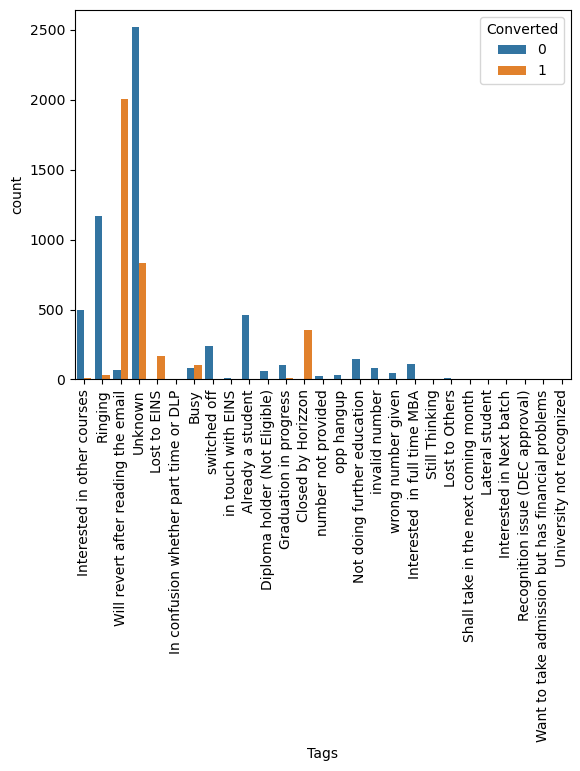

In [114]:
# Plotting the counts of tags for converted and non-converted leads
sns.countplot(data=leads1, x="Tags",hue="Converted")
plt.xticks(rotation=90)
plt.show()

**Since Tags has a large no. of unique values it will be good to combine unique values having very less % of counts for sake of simplicity**

In [115]:
## creating a new column Tags_new and combining all unique values with very less % of counts 
leads1["Tags_new"]=np.where(leads1["Tags"].isin(["Will revert after reading the email","Ringing","Interested in other courses","Already a student","Closed by Horizzon","switched off","Busy","Unknown","Lost to EINS"]),leads1["Tags"],"Other_tags")

In [116]:
## checking unique value percentage of Tags new Column
(leads1["Tags_new"].value_counts(normalize=True,dropna=False)*100)

Unknown                                36.287879
Will revert after reading the email    22.424242
Ringing                                13.019481
Other_tags                              7.305195
Interested in other courses             5.551948
Already a student                       5.032468
Closed by Horizzon                      3.874459
switched off                            2.597403
Busy                                    2.012987
Lost to EINS                            1.893939
Name: Tags_new, dtype: float64

In [117]:
## Dropping the orignal Tags column
leads1.drop(["Tags"],axis=1,inplace=True)

### Handling missing values of Lead Source

In [118]:
# checking null % of lead source
(leads1["Lead Source"].isnull().mean()*100)

0.38961038961038963

In [119]:
## Since percentage of Nan values for Lead Source column is very less, we can impute them with its mode value
lead_source_mode=leads1["Lead Source"].mode()[0]
leads1["Lead Source"].fillna(lead_source_mode,inplace=True)

In [120]:
# checking null % of lead source again
(leads1["Lead Source"].isnull().mean()*100)

0.0

In [121]:
## Checking Value Counts
(leads1["Lead Source"].value_counts(normalize=True, dropna=False)*100)

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [122]:
## Since unique value google and Google is repeated twice, we can merge them both
leads1["Lead Source 1"] = leads1["Lead Source"].str.replace("google", "Google")

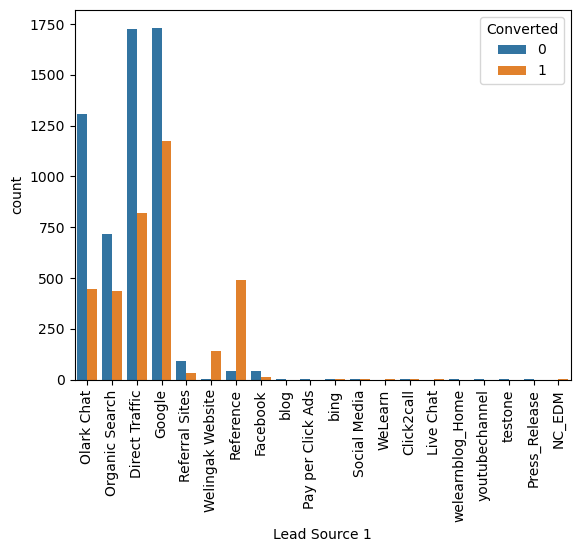

In [123]:
# Plotting the counts of Lead Source for converted and non-converted leads
sns.countplot(data=leads1, x="Lead Source 1",hue="Converted")
plt.xticks(rotation=90)
plt.show()

**Since Lead Source column has a large no. of unique values it will be good to combine unique values having very less % of counts for sake of simplicity**

In [124]:
## creating a new column Lead Source new_new and combining all unique values with very less % of counts 
leads1["Lead Source new"]=np.where(leads1["Lead Source 1"].isin(["Google","Direct Traffic","Olark Chat","Organic Search","Reference","Welingak Website"]),leads1["Lead Source 1"],"Other_lead_source")

In [125]:
# Checking value counts of lead source new column
(leads1["Lead Source new"].value_counts(normalize=True, dropna=False))*100

Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Other_lead_source     2.196970
Welingak Website      1.536797
Name: Lead Source new, dtype: float64

In [126]:
# Dropping the orignal lead source 1 column
leads1.drop(["Lead Source 1"], axis=1,inplace=True)
leads1.drop(["Lead Source"], axis=1,inplace=True)

### Handling Missing values of Total Visits column

In [127]:
## Checking value counts of total visits
(leads1["TotalVisits"].value_counts(normalize=True, dropna=False)*100)

0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
NaN       1.482684
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
24.0      0.054113
25.0      0.054113
27.0      0.054113
22.0      0.032468
29.0      0.021645
28.0      0.021645
26.0      0.021645
141.0     0.010823
55.0      0.010823
30.0      0.010823
43.0      0.010823
74.0      0.010823
41.0      0.010823
54.0      0.010823
115.0     0.010823
251.0     0.010823
32.0      0.010823
42.0      0.010823
Name: TotalVisits, dtype: float64

In [128]:
# Calculating median of Total Visits column
leads1["TotalVisits"].median()

3.0

In [129]:
## Since percentage of Nan values for Total Visits column is very less, we can impute them with its median value
lead_visits_mode=leads1["TotalVisits"].median()
leads1["TotalVisits"].fillna(lead_visits_mode,inplace=True)

### Handling Missing values of Page Views Per Visit

In [130]:
# Checking value counts of page views per visit
leads1["Page Views Per Visit"].value_counts(normalize=True, dropna=False)

0.00    0.236905
2.00    0.194264
3.00    0.129437
4.00    0.096970
1.00    0.070455
          ...   
2.56    0.000108
6.33    0.000108
1.64    0.000108
8.21    0.000108
2.08    0.000108
Name: Page Views Per Visit, Length: 115, dtype: float64

In [131]:
# Calculating median of Page Views Per Visit
leads1["Page Views Per Visit"].median()

2.0

In [132]:
## Since percentage of Nan values for Page Views Per Visit column is very less, we can impute them with its mode value
lead_page_mode=leads1["Page Views Per Visit"].median()
leads1["Page Views Per Visit"].fillna(lead_page_mode,inplace=True)

### Handling Missing values of Last Activity 

In [133]:
# Checking value counts of Last acivity column
(leads1["Last Activity"].value_counts(normalize=True, dropna=False)*100)

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [134]:
## Since percentage of Nan values for Last Activity column is very less, we can impute them with its mode value
lead_page_mode=leads1["Last Activity"].mode()[0]
leads1["Last Activity"].fillna(lead_page_mode,inplace=True)

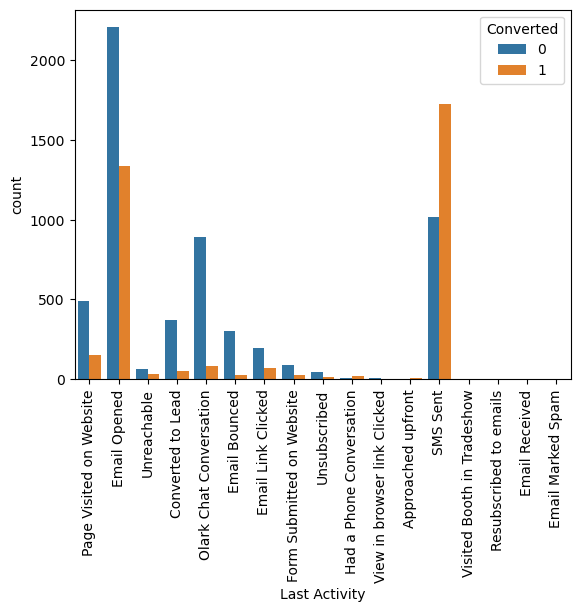

In [135]:
# Plotting the counts of Last activity for converted and non-converted leads
sns.countplot(data=leads1, x="Last Activity",hue="Converted")
plt.xticks(rotation=90)
plt.show()

**Since Last Activity column has a large no. of unique values it will be good to combine unique values having very less % of counts for sake of simplicity**

In [136]:
## creating a new column Last Activity new and combining all unique values with very less % of counts 
leads1["Last Activity new"]=np.where(leads1["Last Activity"].isin(["Email Opened","SMS Sent","Olark Chat Conversation","Page Visited on Website","Converted to Lead","Email Bounced","Email Link Clicked"]),leads1["Last Activity"],"Other_last_activities")

In [137]:
# Checking value counts of Last Activity new column
(leads1["Last Activity new"].value_counts(normalize=True, dropna=False)*100)

Email Opened               38.311688
SMS Sent                   29.707792
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Converted to Lead           4.632035
Email Bounced               3.528139
Other_last_activities       3.474026
Email Link Clicked          2.889610
Name: Last Activity new, dtype: float64

In [138]:
# Dropping the orignal Last Activity column
leads1.drop(["Last Activity"], axis=1,inplace=True)

### Checking value counts of Lead Origin

In [139]:
# Checking value counts of lead origin
(leads1["Lead Origin"].value_counts(normalize=True, dropna=False))*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

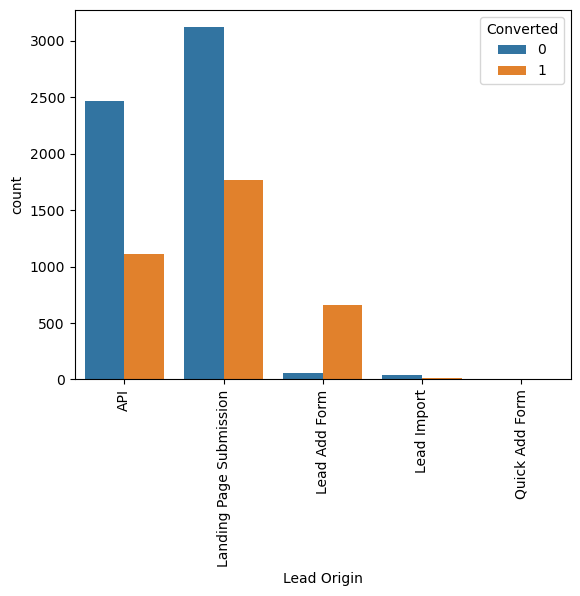

In [140]:
# Plotting the counts of Lead Origin for converted and non-converted leads
sns.countplot(data=leads1, x="Lead Origin",hue="Converted")
plt.xticks(rotation=90)
plt.show()

**Since Lead Origin has a large no. of unique values it will be good to combine unique values having very less % of counts for sake of simplicity**

In [141]:
## creating a new column Lead origin new and combining all unique values with very less % of counts 
leads1["Lead Origin new"]=np.where(leads1["Lead Origin"].isin(["Landing Page Submission","API","Lead Add Form"]),leads1["Lead Origin"],"Other_origin")

In [142]:
# Checking value counts of lead origin new
(leads1["Lead Origin new"].value_counts(normalize=True, dropna=False))*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Other_origin                0.606061
Name: Lead Origin new, dtype: float64

In [143]:
# Dropping the orignal lead origin column
leads1.drop(["Lead Origin"], axis=1,inplace=True)

### Checking value counts of Last Notable Activity

In [144]:
# Checking value counts of Last Notable Activity
(leads1["Last Notable Activity"].value_counts(normalize=True, dropna=False))*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

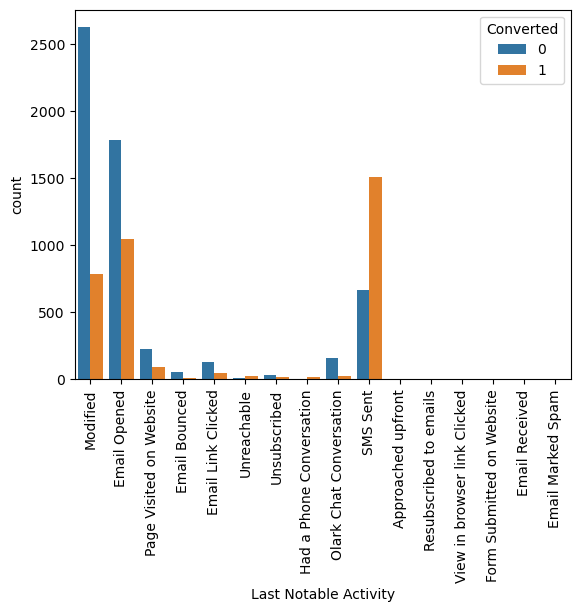

In [145]:
# Plotting the counts of Last Notable Activity for converted and non-converted leads
sns.countplot(data=leads1, x="Last Notable Activity",hue="Converted")
plt.xticks(rotation=90)
plt.show()

**Since Last Notable Activity has a large no. of unique values it will be good to combine unique values having very less % of counts for sake of simplicity**

In [146]:
## creating a new column Last Notable Activity new and combining all unique values with very less % of counts
leads1["Last Notable Activity new"]=np.where(leads1["Last Notable Activity"].isin(["Modified","Email Opened","SMS Sent","Page Visited on Website","Olark Chat Conversation","Email Link Clicked"]),leads1["Last Notable Activity"],"Other_notable_activity")

In [147]:
# Dropping the orignal lead notable activty column
leads1.drop(["Last Notable Activity"], axis=1,inplace=True)

In [148]:
# Checking value counts of Last Notable Activity new
(leads1["Last Notable Activity new"].value_counts(normalize=True, dropna=False))*100

Modified                   36.872294
Email Opened               30.595238
SMS Sent                   23.506494
Page Visited on Website     3.441558
Olark Chat Conversation     1.980519
Email Link Clicked          1.872294
Other_notable_activity      1.731602
Name: Last Notable Activity new, dtype: float64

In [149]:
# Checking null values again
leads1_null1=(leads1.isnull().mean())*100
leads1_null1

Do Not Email                                         0.0
Do Not Call                                          0.0
Converted                                            0.0
TotalVisits                                          0.0
Total Time Spent on Website                          0.0
Page Views Per Visit                                 0.0
Search                                               0.0
Magazine                                             0.0
Newspaper Article                                    0.0
X Education Forums                                   0.0
Newspaper                                            0.0
Digital Advertisement                                0.0
Through Recommendations                              0.0
Receive More Updates About Our Courses               0.0
Update me on Supply Chain Content                    0.0
Get updates on DM Content                            0.0
I agree to pay the amount through cheque             0.0
A free copy of Mastering The In

**Since no column has any missing values left, we are good to move ahead**

In [150]:
# Checking the shape of dataset again
leads1.shape

(9240, 26)

## Outlier Check

### Outlier check of Total Time Spent on Website

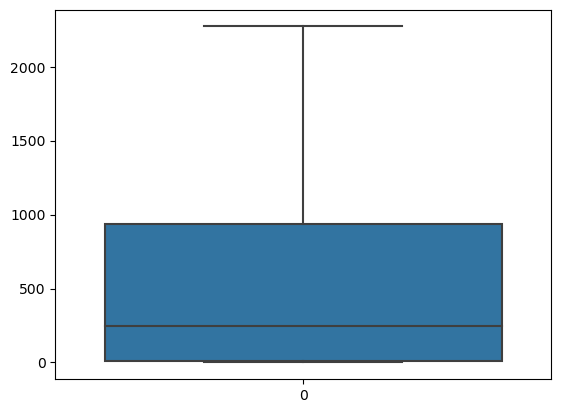

In [151]:
# Plotting box plot for Total Time Spent on Website column
sns.boxplot(leads1["Total Time Spent on Website"])
plt.show()

**No major potential outliers detected in Total Time Spent on Website column**

### Outlier check of Page Views Per Visit

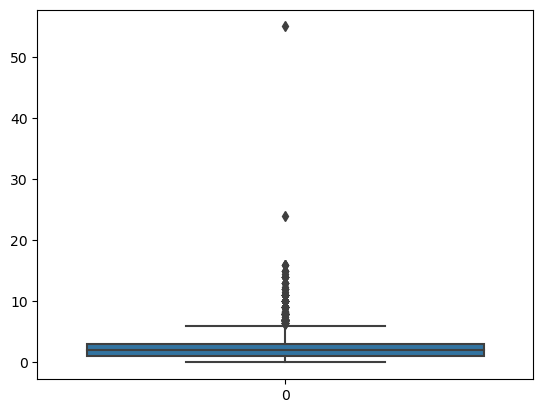

In [152]:
# Plotting box plot for Page Views Per Visit column
sns.boxplot(leads1["Page Views Per Visit"])
plt.show()

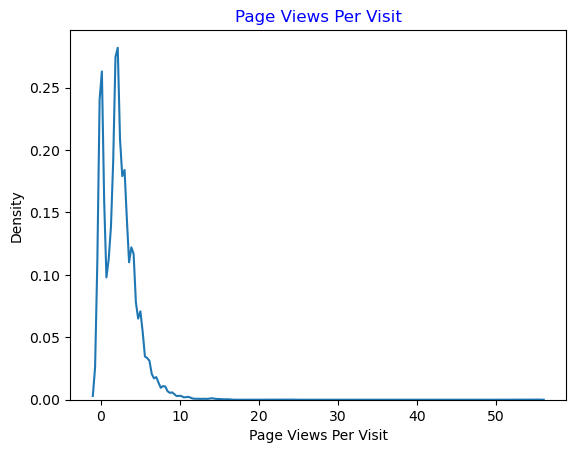

In [153]:
# Checking the kde plot 
sns.kdeplot(data=leads1["Page Views Per Visit"])
plt.title("Page Views Per Visit",fontdict={"fontsize":12,"fontweight":10,"color":"blue"})
plt.show()

**kde plot seems to be skewed due to outliers**

In [154]:
# Checking various quantile values of Page Views Per Visit
leads1["Page Views Per Visit"].quantile([0.5,0.7,0.9,0.95,0.99,0.999])

0.500     2.0000
0.700     3.0000
0.900     5.0000
0.950     6.0000
0.990     9.0000
0.999    14.3805
Name: Page Views Per Visit, dtype: float64

In [155]:
# Filtering out data above 99.9% value and checking the median
cond_page_visit=leads1[leads1["Page Views Per Visit"] > 14.3805]
print(int(cond_page_visit["Page Views Per Visit"].median()))
print(cond_page_visit.shape)

15
(10, 26)


In [156]:
# capping the outliers to median of values above 99.9% 
leads1.loc[(leads1["Page Views Per Visit"]>14.3805),"Page Views Per Visit"]=15

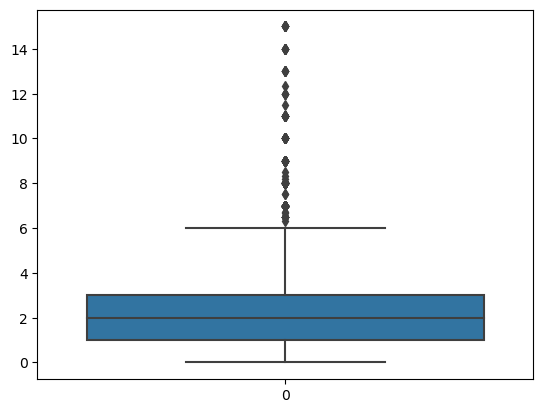

In [157]:
# Rechecking box plot
sns.boxplot(leads1["Page Views Per Visit"])
plt.show()

In [158]:
# Checking max value
leads1["Page Views Per Visit"].describe()

count    9240.000000
mean        2.351867
std         2.069082
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: Page Views Per Visit, dtype: float64

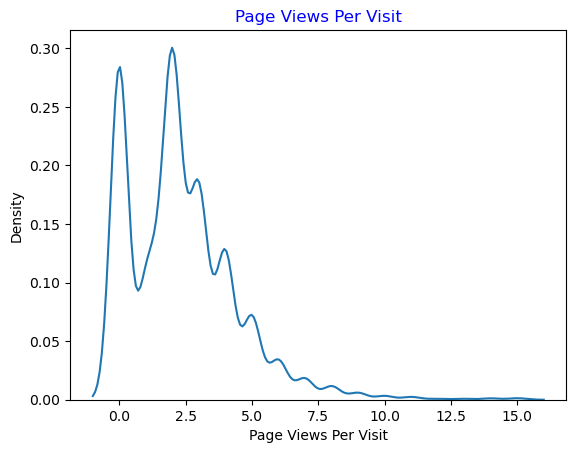

In [159]:
# Checking the kde plot  again
sns.kdeplot(data=leads1["Page Views Per Visit"])
plt.title("Page Views Per Visit",fontdict={"fontsize":12,"fontweight":10,"color":"blue"})
plt.show()

### Outlier check of TotalVisits

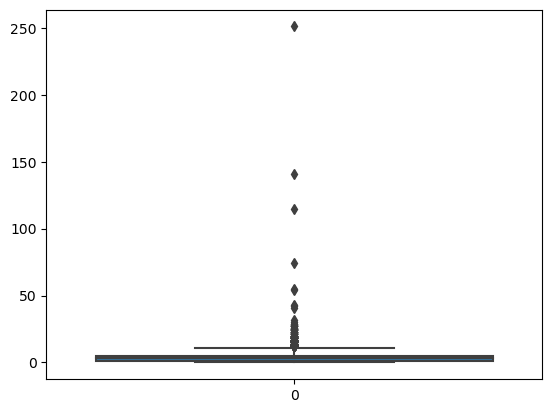

In [160]:
# Plotting box plot for TotalVisits column
sns.boxplot(leads1["TotalVisits"])
plt.show()

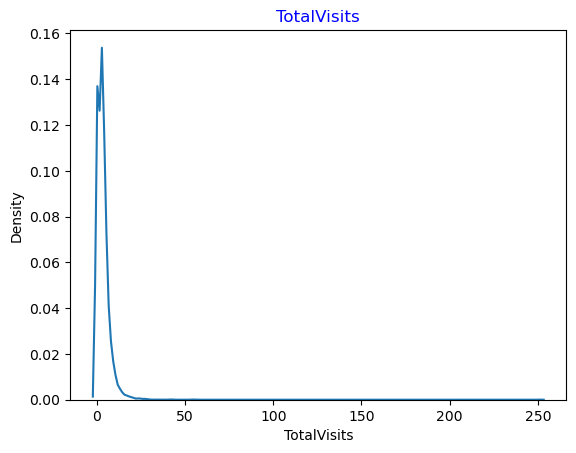

In [161]:
# Checking the kde plot 
sns.kdeplot(data=leads1["TotalVisits"])
plt.title("TotalVisits",fontdict={"fontsize":12,"fontweight":10,"color":"blue"})
plt.show()

In [162]:
# Checking various quantile values of Page Views Per Visit
leads1["TotalVisits"].quantile([0.5,0.7,0.9,0.95,0.99,0.999])

0.500     3.000
0.700     4.000
0.900     7.000
0.950    10.000
0.990    17.000
0.999    31.522
Name: TotalVisits, dtype: float64

In [163]:
# Filtering out data above 99.9% value and checking the median
cond_total_visit=leads1[leads1["TotalVisits"] > 31.522]
print(cond_total_visit.shape)
print(int(cond_total_visit["TotalVisits"].median()))

(10, 26)
54


In [164]:
# capping the outliers to median of values above 99.9% 
leads1.loc[(leads1["TotalVisits"]>31.522),"TotalVisits"]=54

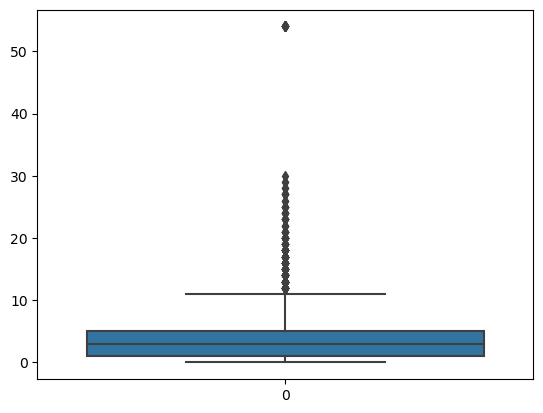

In [165]:
# Plotting box plot for Total Visits column
sns.boxplot(leads1["TotalVisits"])
plt.show()

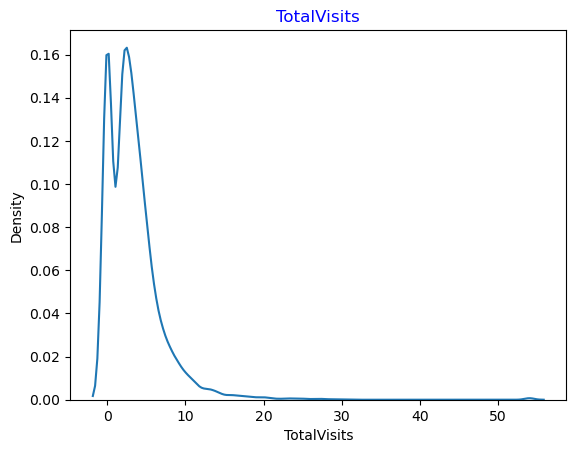

In [166]:
# Checking the kde plot again
sns.kdeplot(data=leads1["TotalVisits"])
plt.title("TotalVisits",fontdict={"fontsize":12,"fontweight":10,"color":"blue"})
plt.show()

In [167]:
# Checking the max values of numerical columns
leads1.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.405303,487.698268,2.351867
std,0.486714,3.779608,548.021466,2.069082
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,54.000000,2272.000000,15.000000


In [168]:
# Checking column names of dataset
leads1.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Specialization_new',
       'What is your current occupation 1',
       'What matters most to you in choosing a course new', 'Tags_new',
       'Lead Source new', 'Last Activity new', 'Lead Origin new',
       'Last Notable Activity new'],
      dtype='object')

## EDA

In [169]:
# Bifurcating categorical, numerical and target columns
cat_cols=['Do Not Email', 'Do Not Call', 'Search','Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview',
       'Specialization_new','What is your current occupation 1','What matters most to you in choosing a course new', 'Tags_new',
       'Lead Source new', 'Last Activity new', 'Lead Origin new','Last Notable Activity new']
num_cols=['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']
target_cols=["Converted"]

In [170]:
len(cat_cols)+len(num_cols)+len(target_cols)

26

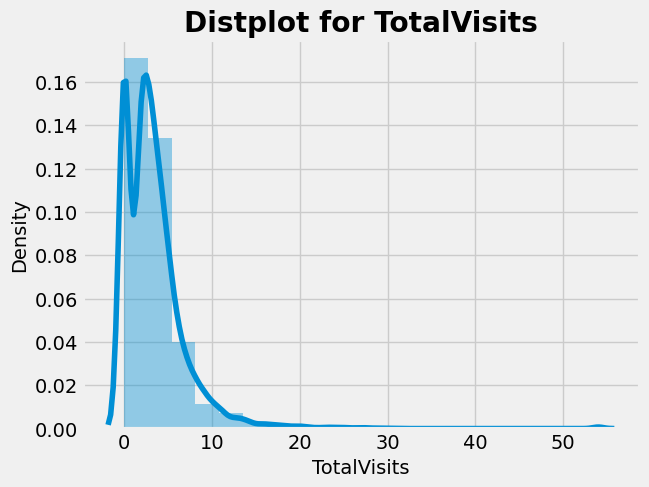

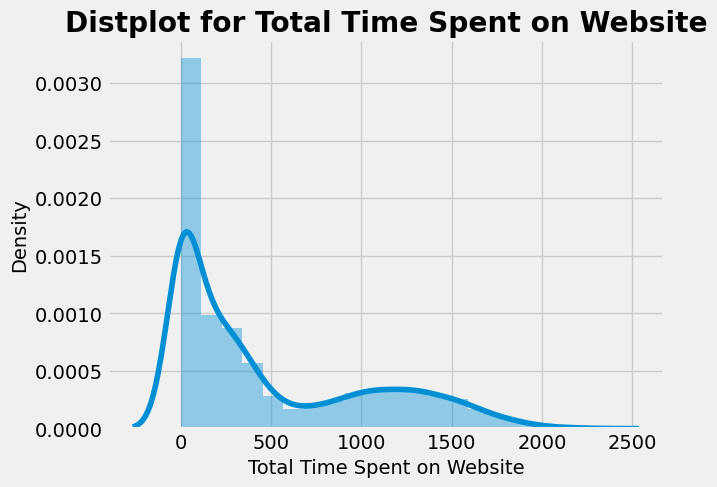

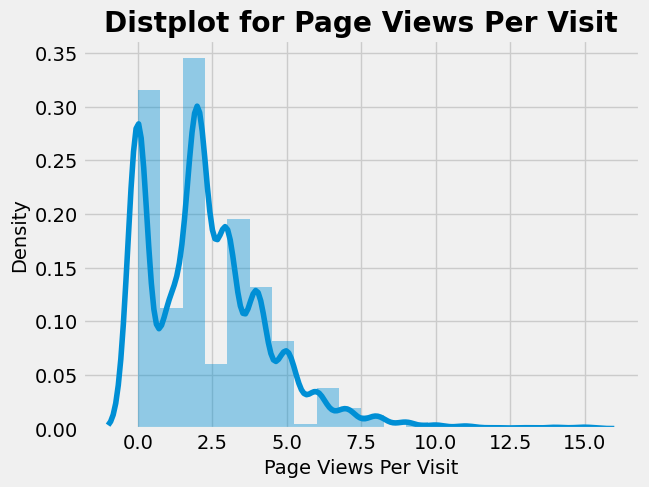

In [171]:
# Univariate analysis of contineous columns
for i in num_cols:
    plt.style.use("fivethirtyeight")
    sns.distplot(leads1[i], bins=20)
    plt.xlabel(i)
    plt.title("Distplot for" +" "+i, fontweight="heavy")
    
    plt.show()

**From above plots, following inferences can be made**

1. TotalVisits has maximum density at 0-5(approx.) nos
2. Total time spent on website has max density at 0-100 (approx.)
3. Page views per visit is max at 0-1 (approx.)

Do Not Email


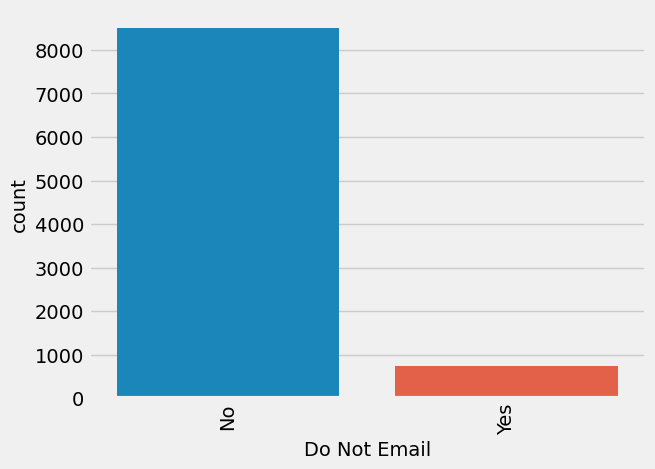

Do Not Call


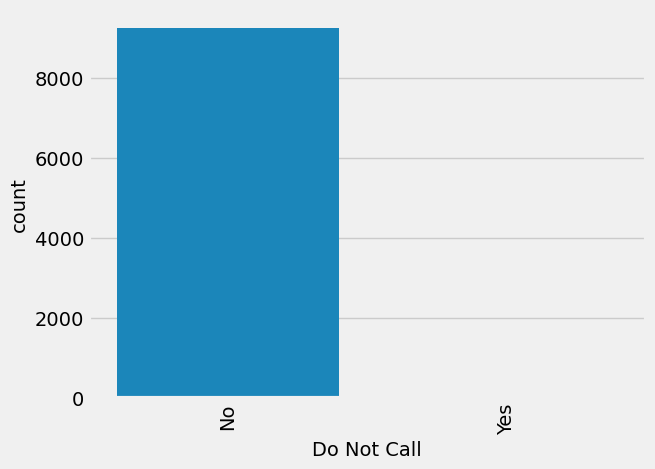

Search


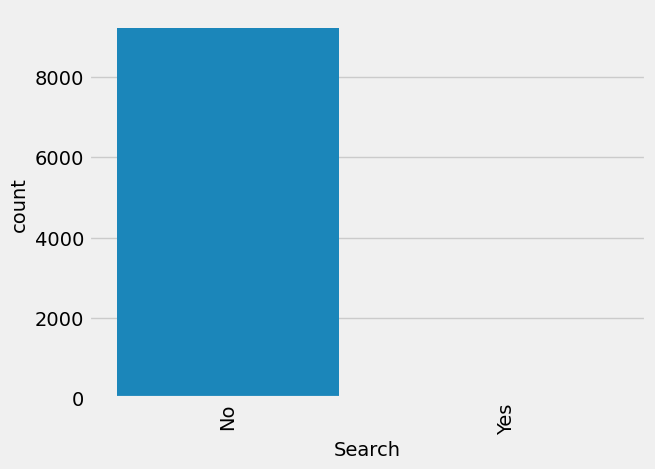

Magazine


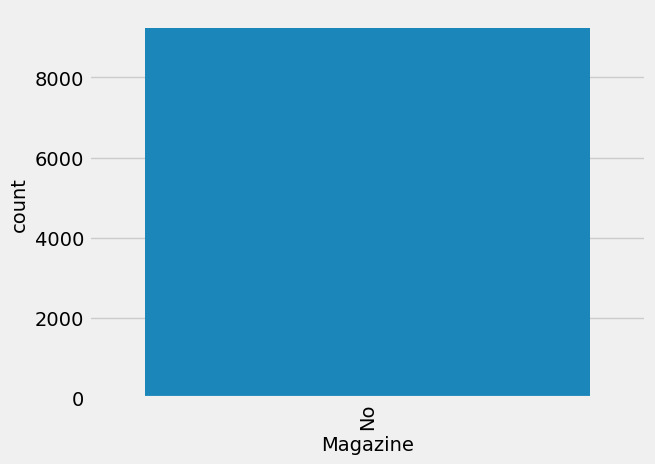

Newspaper Article


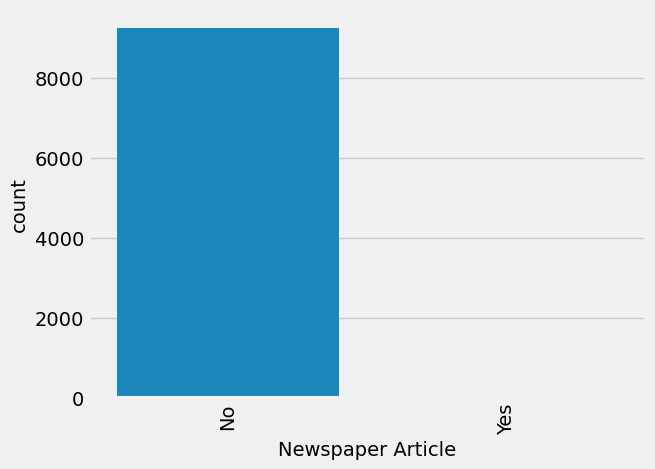

X Education Forums


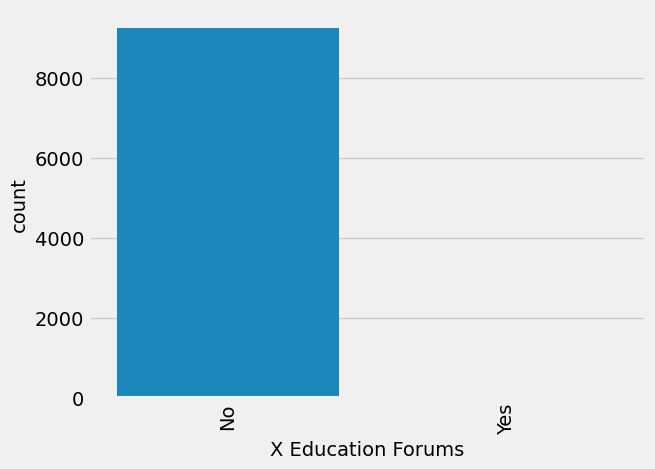

Newspaper


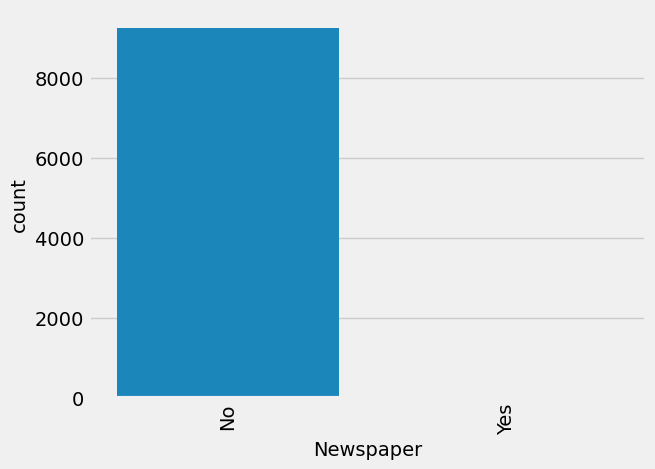

Digital Advertisement


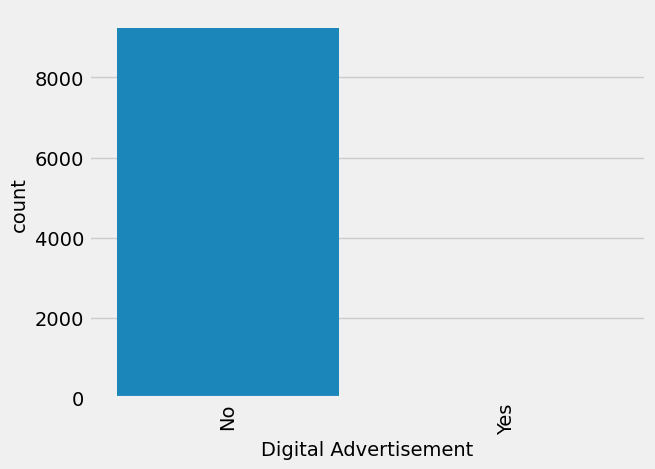

Through Recommendations


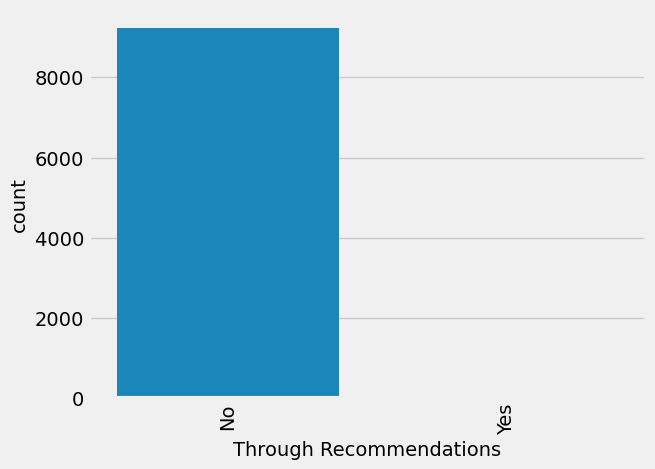

Receive More Updates About Our Courses


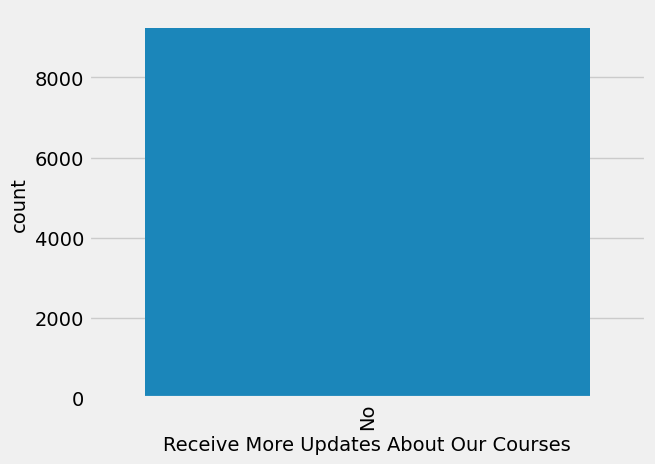

Update me on Supply Chain Content


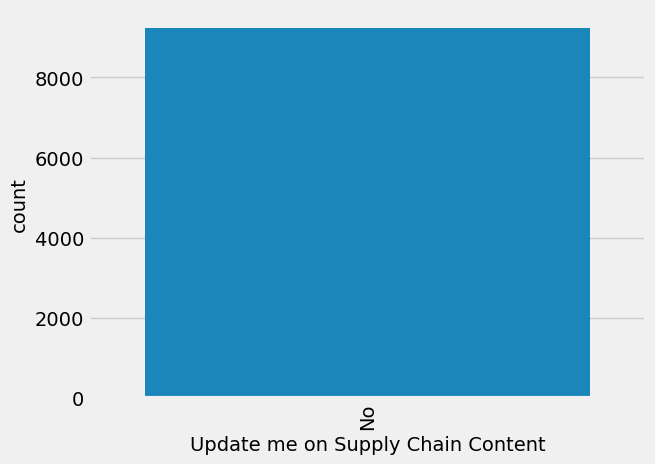

Get updates on DM Content


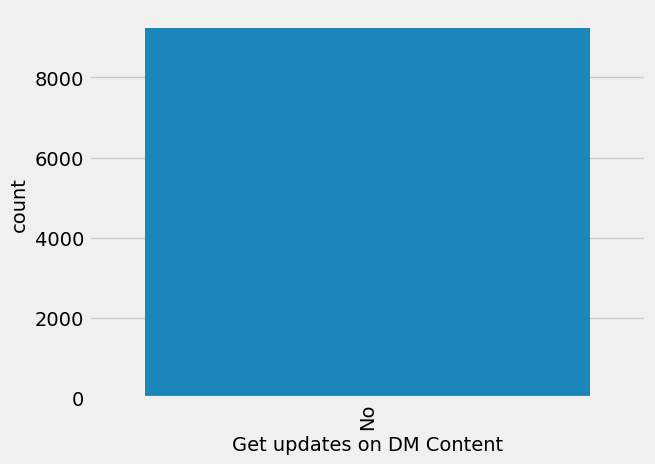

I agree to pay the amount through cheque


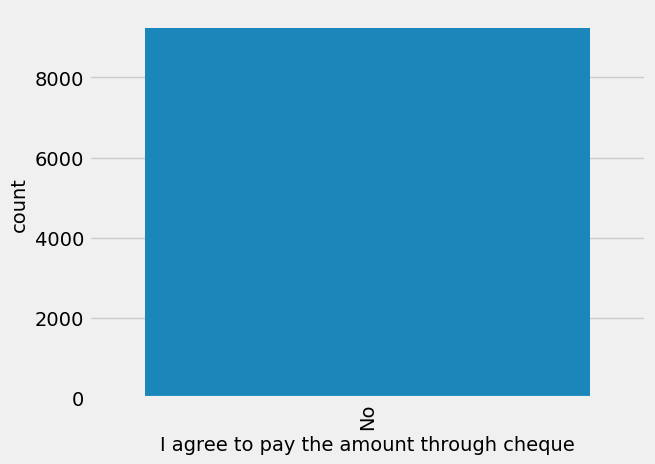

A free copy of Mastering The Interview


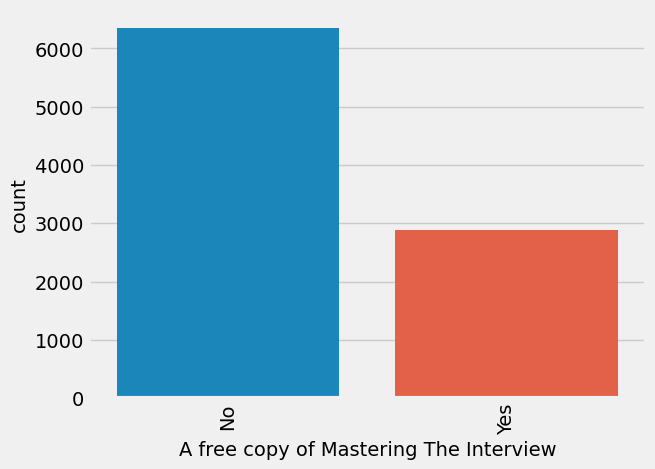

Specialization_new


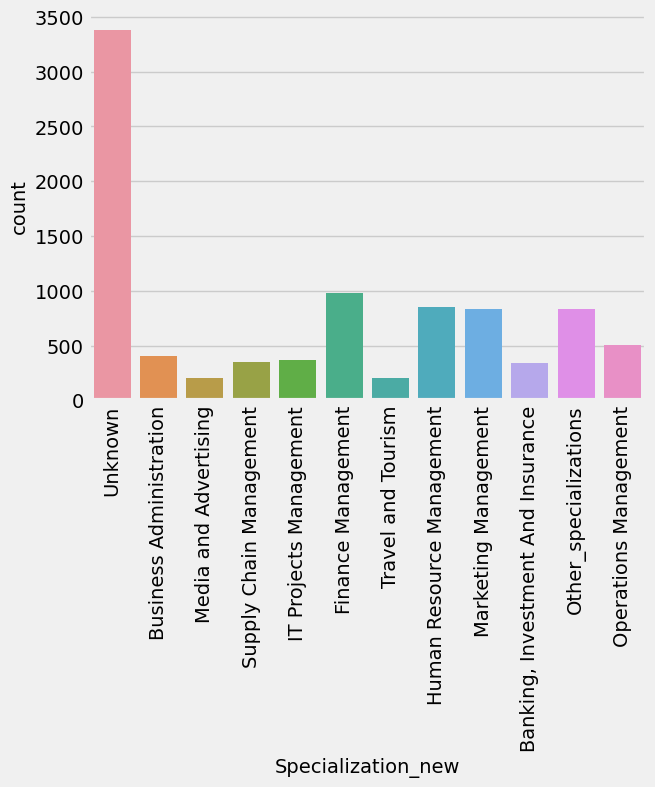

What is your current occupation 1


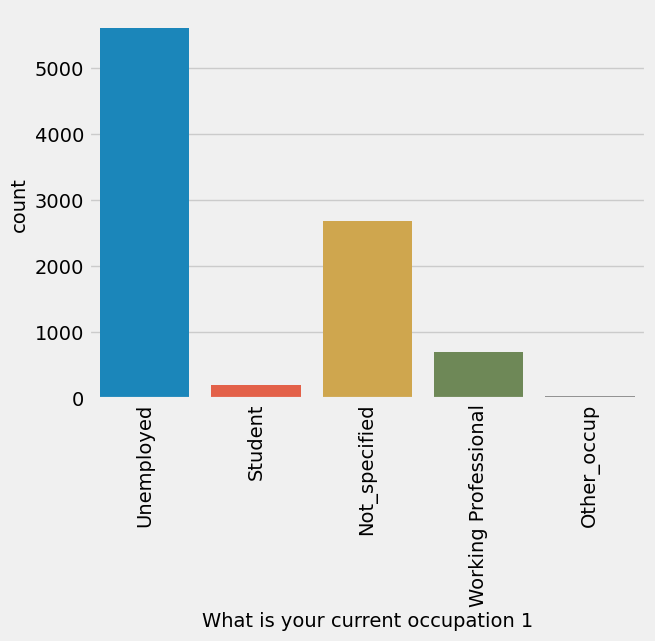

What matters most to you in choosing a course new


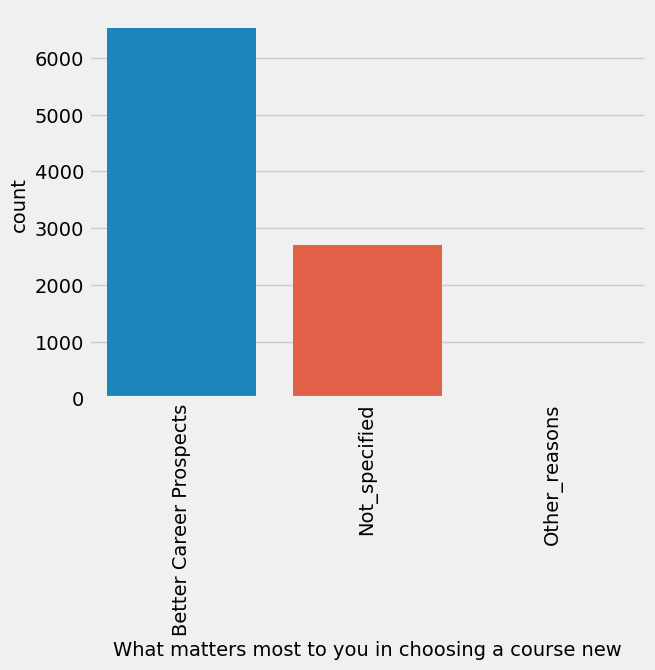

Tags_new


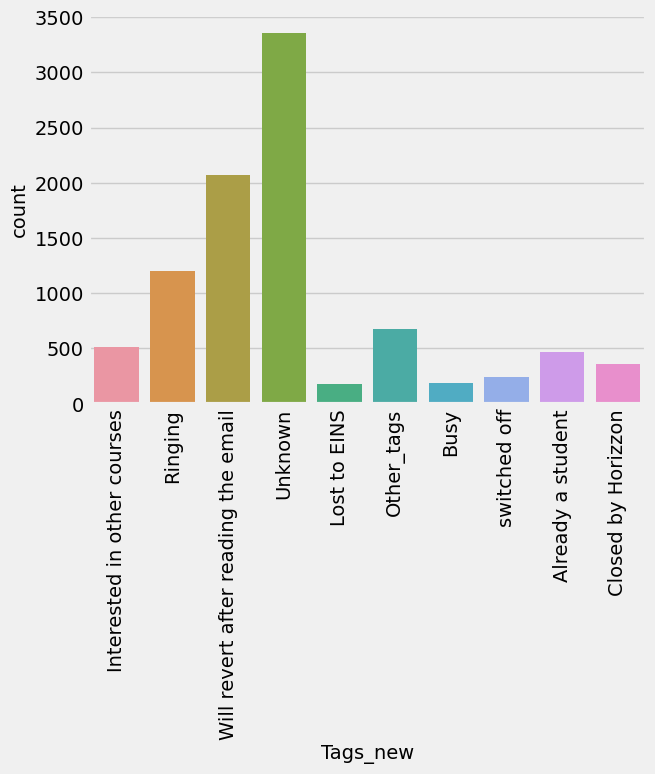

Lead Source new


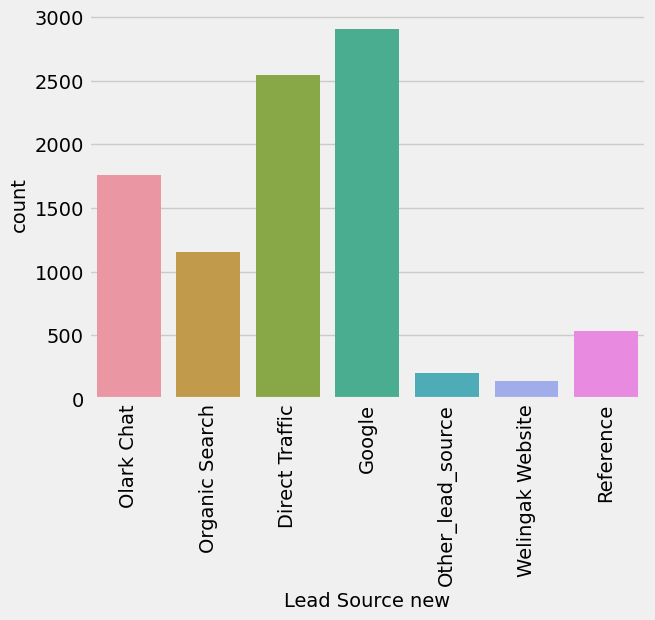

Last Activity new


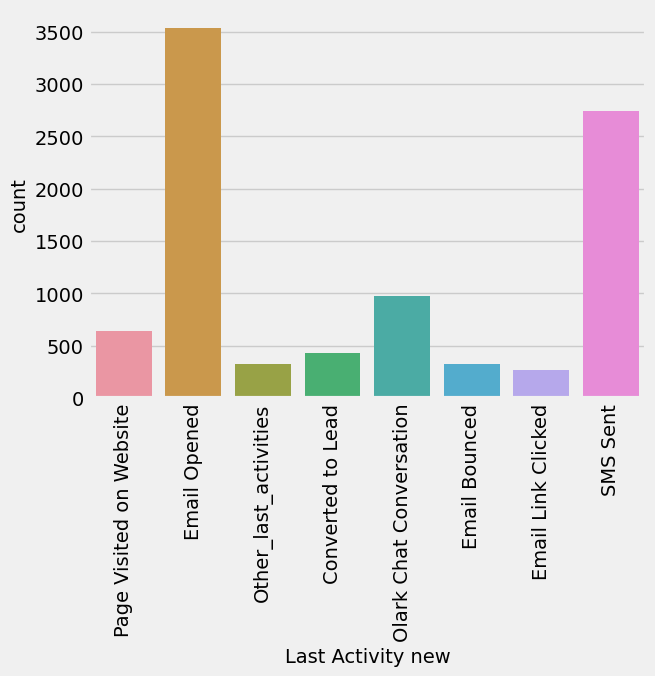

Lead Origin new


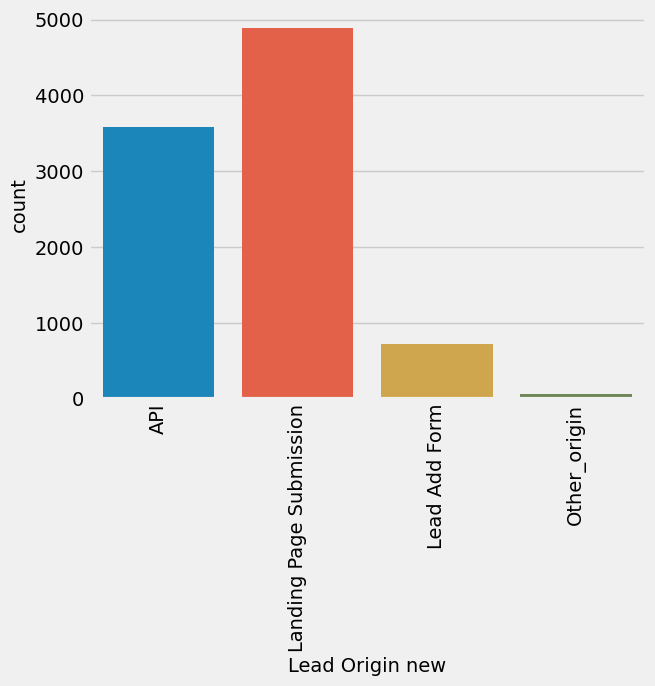

Last Notable Activity new


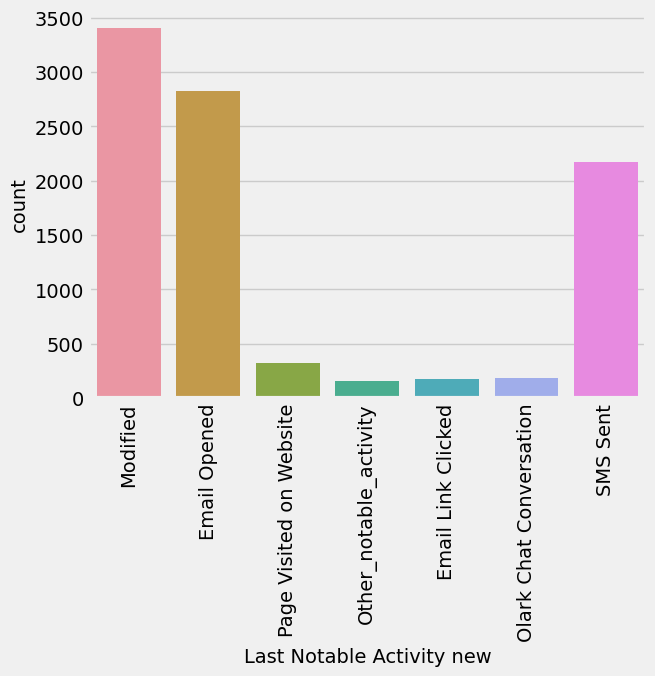

In [172]:
# Univariate analysis of categorical columns
for i in cat_cols:
    print("\033[1m" + i + "\033[0m")
    sns.countplot(x=leads1[i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.show()

**From above plots, following inferences can be made**

1. Do not email,Do not call,search,Newspaper Article,Newspaper, X Education Forums,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview has more no. of Nos than Yes
2. Magazine,Receive More Updates About Our Courses, Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque has only "no" unique value and has none "yes" unique value.
3. Maximum count of city column is unknown followed by Mumbai
4. Maximum leads/Customers are from India.
5. Specialization of most of leads/customers are unknown followed by Finance Management
6. Most of leads/customers are unemployed
7. Better career prospects is the most popular criteria for leads/customers while choosing a course
8. Tags of most leads/customers are unknown followed by will revert after reading the email.
9. Most of the leads source from Google.
10. Most lead's / customer's last activity is email opened
11. Most of lead origin from landing page submission
12. For most of the leads/customer, last notable activity is modified


## Bivariate Analysis

### Categorical columns V/s Target column

Do Not Email


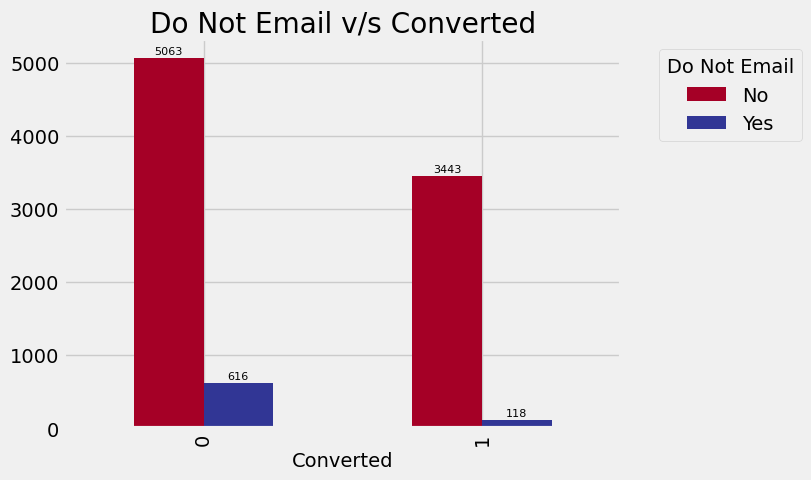

Do Not Call


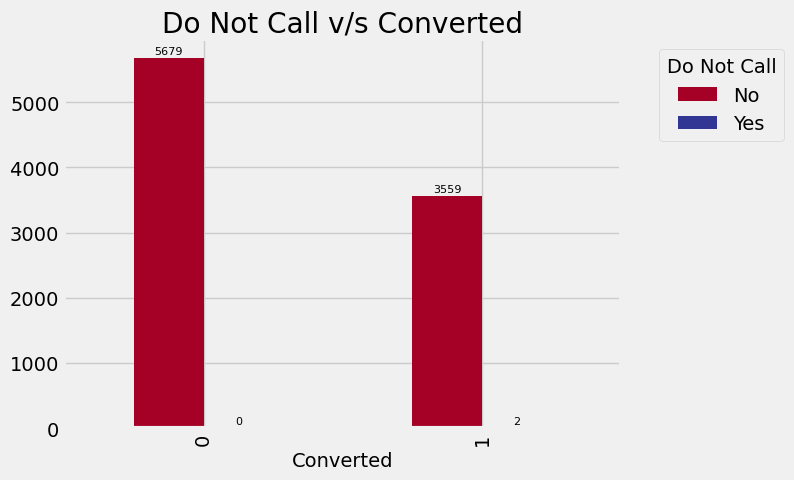

Search


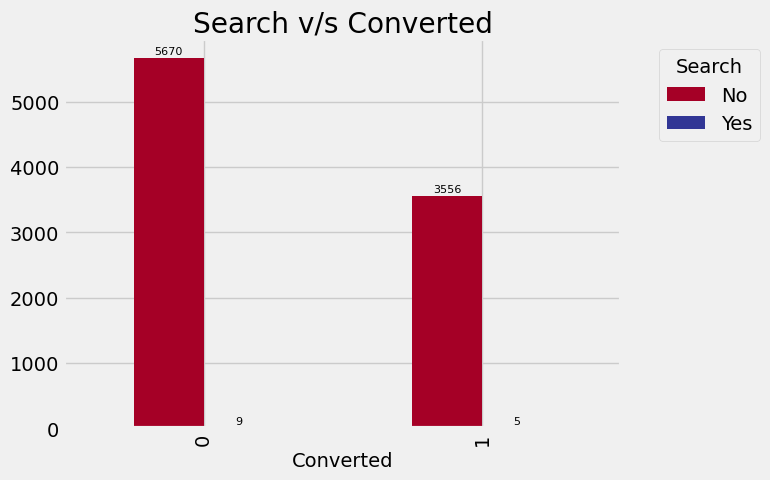

Magazine


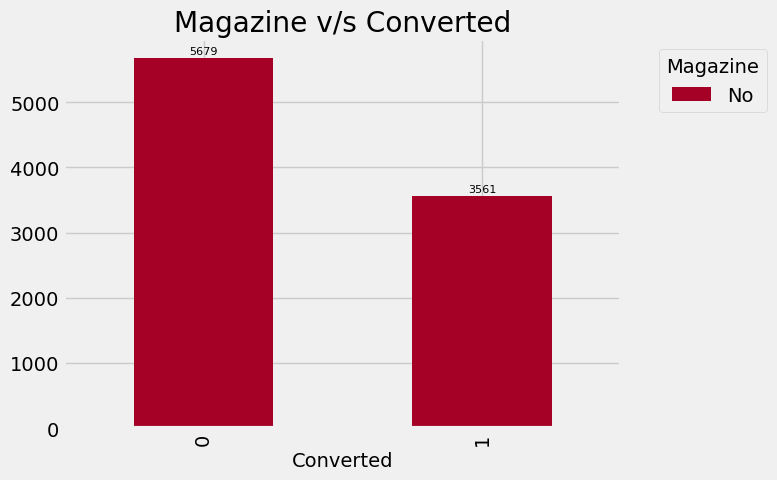

Newspaper Article


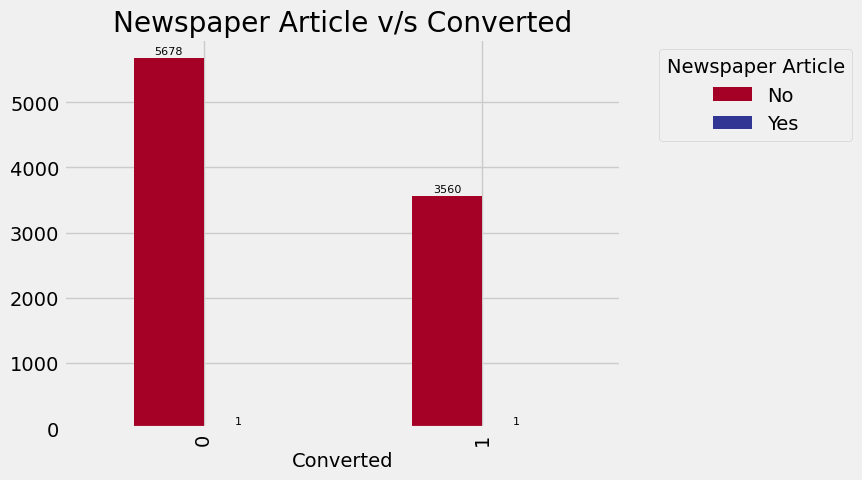

X Education Forums


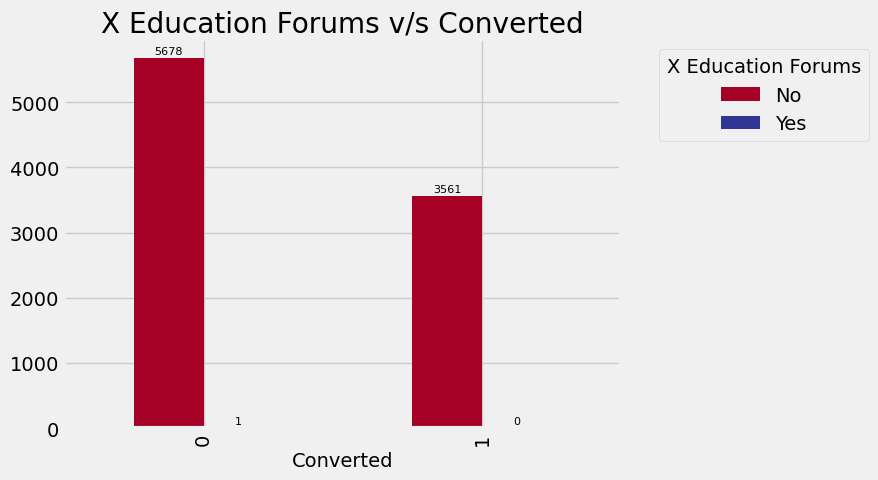

Newspaper


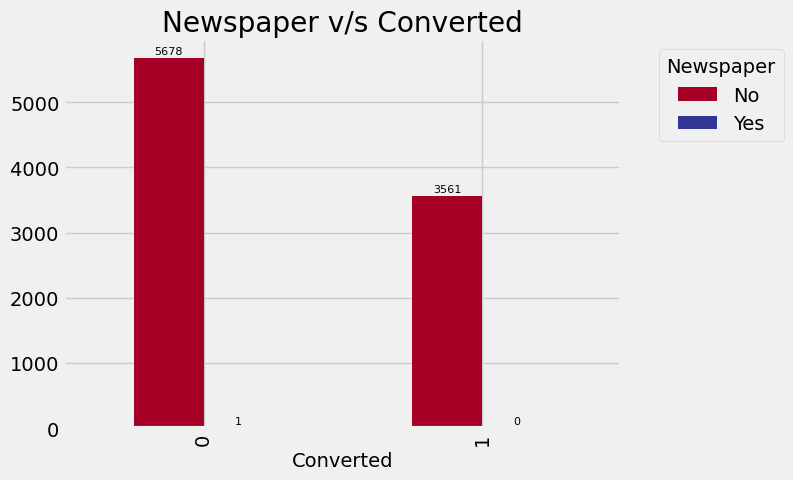

Digital Advertisement


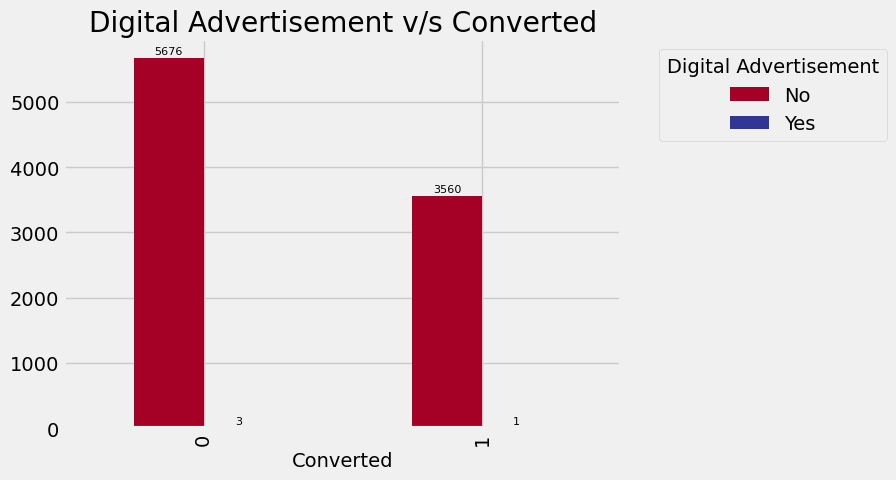

Through Recommendations


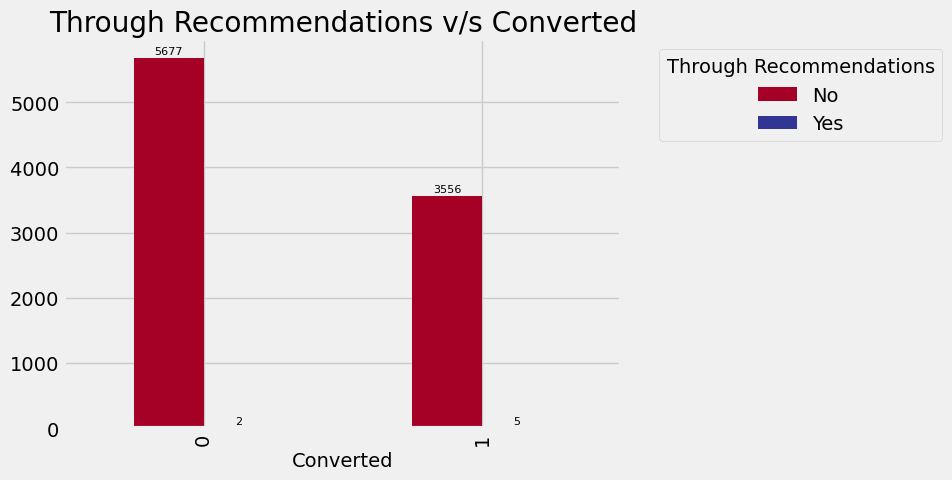

Receive More Updates About Our Courses


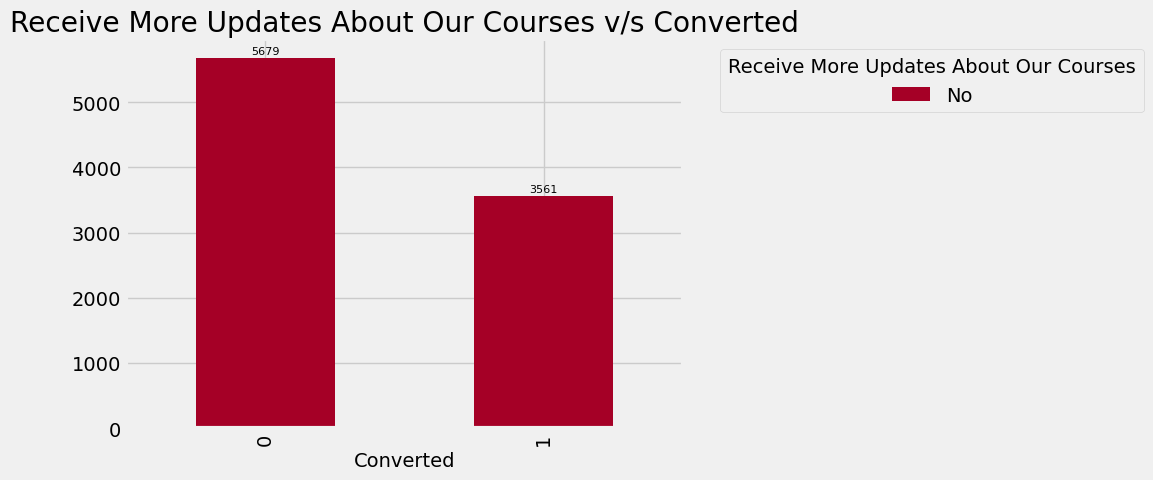

Update me on Supply Chain Content


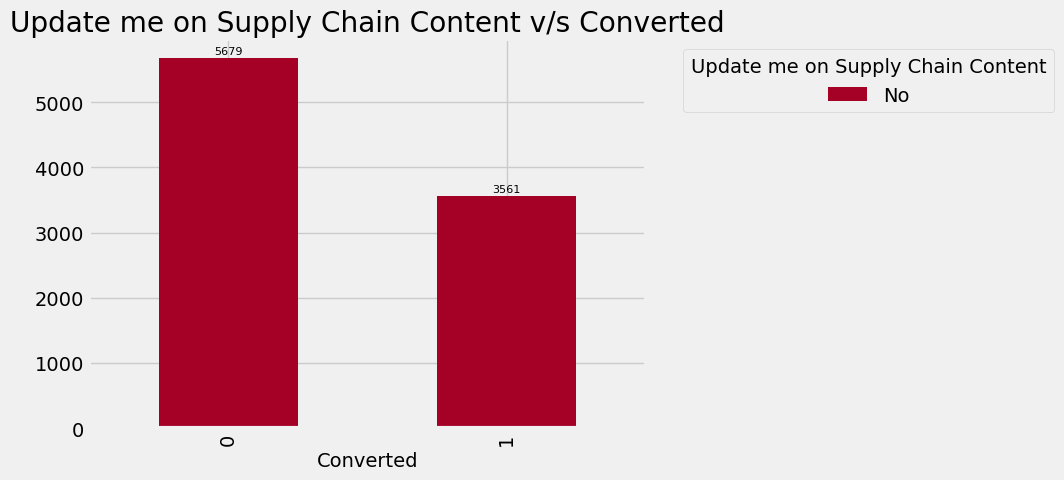

Get updates on DM Content


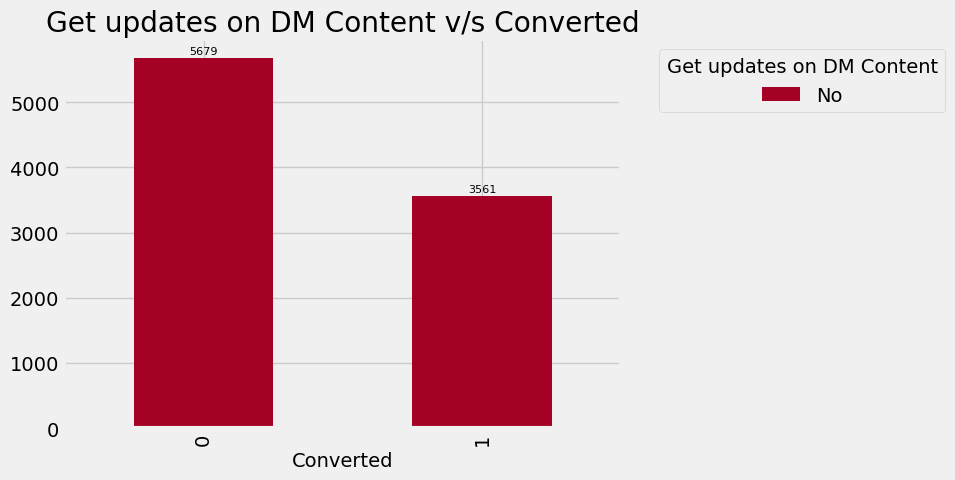

I agree to pay the amount through cheque


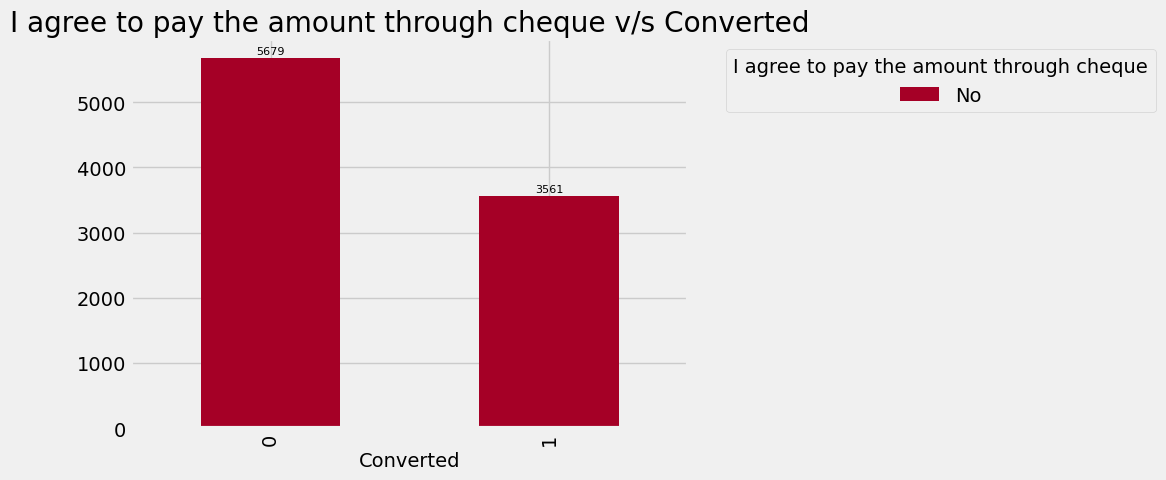

A free copy of Mastering The Interview


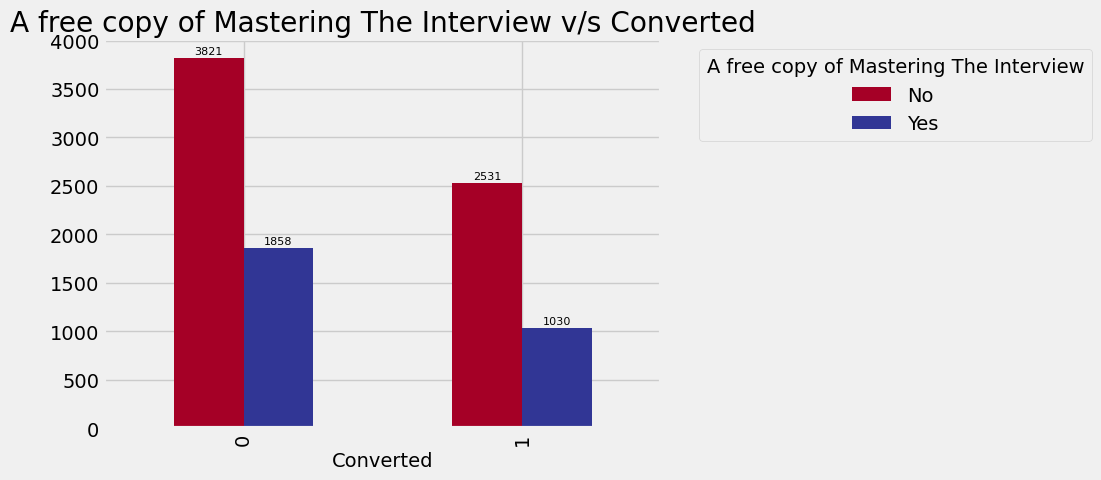

Specialization_new


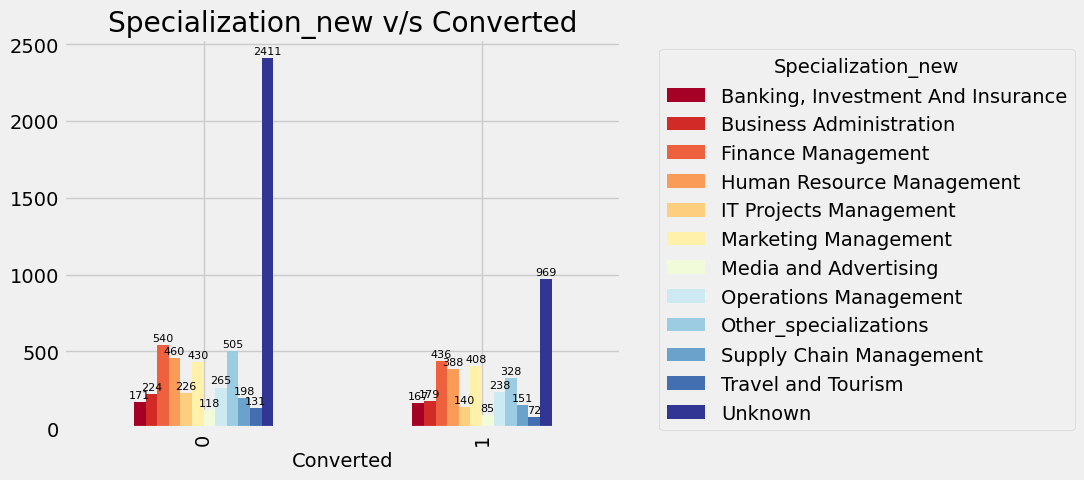

What is your current occupation 1


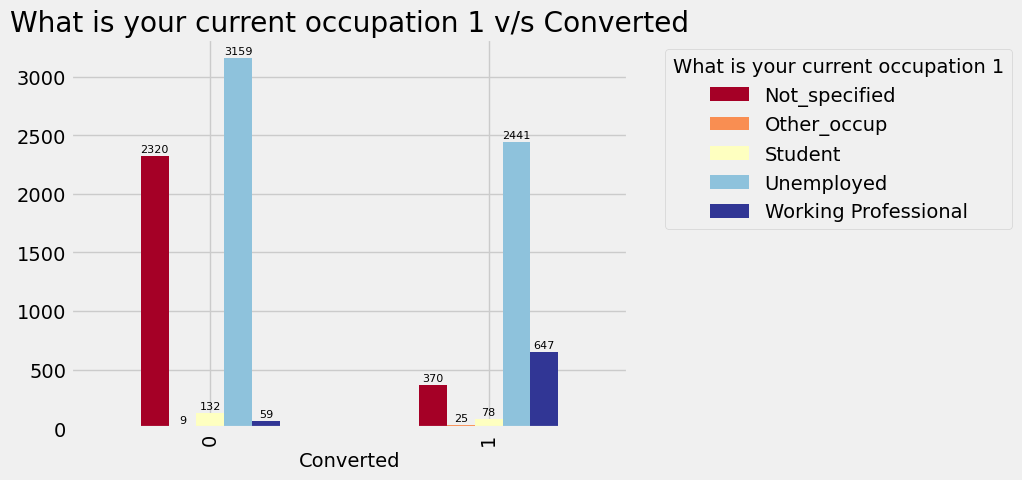

What matters most to you in choosing a course new


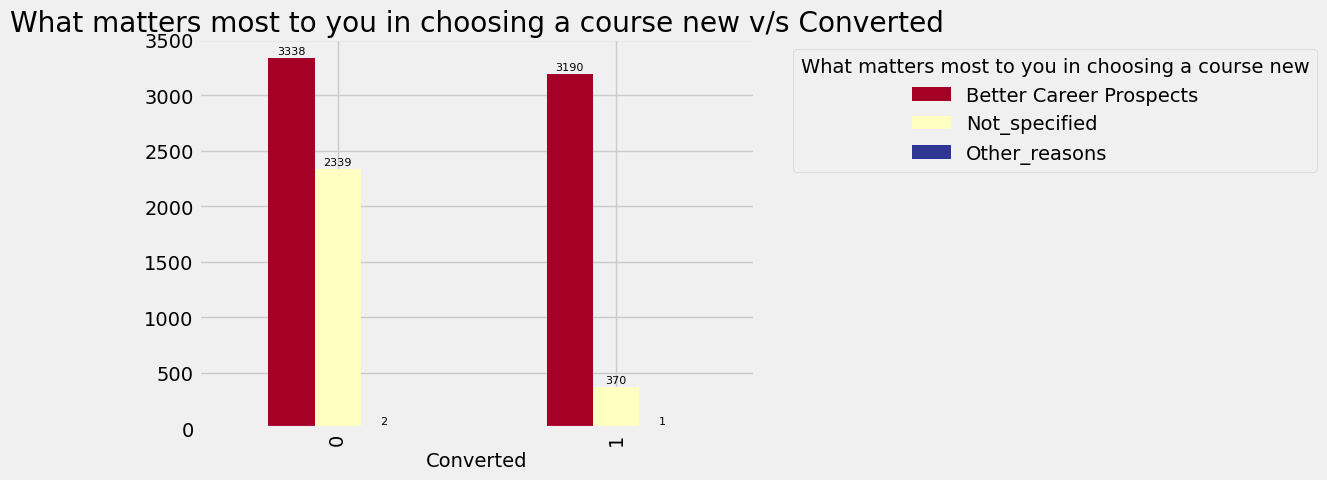

Tags_new


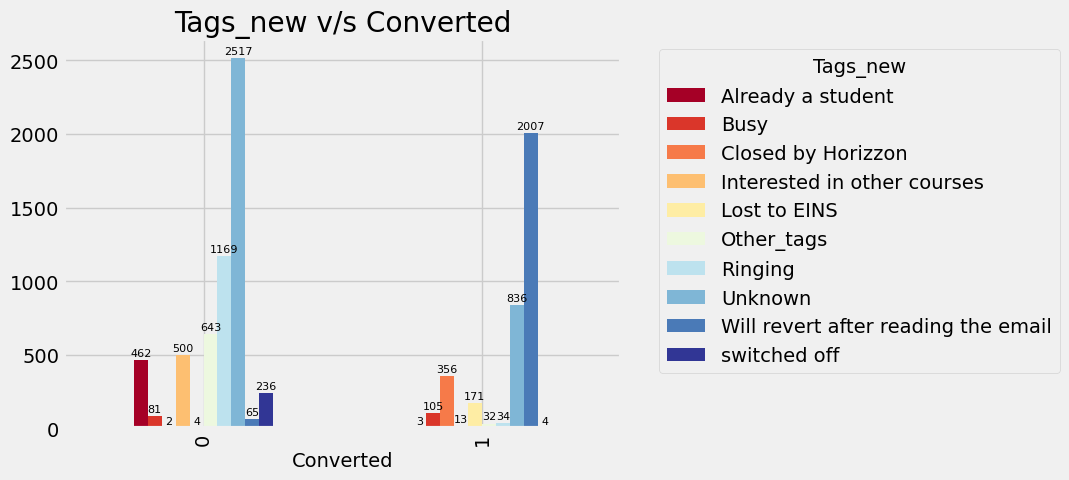

Lead Source new


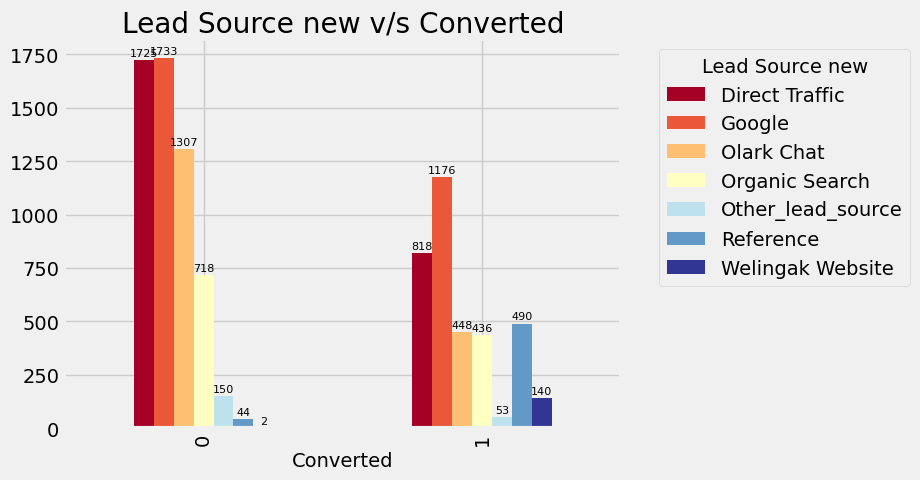

Last Activity new


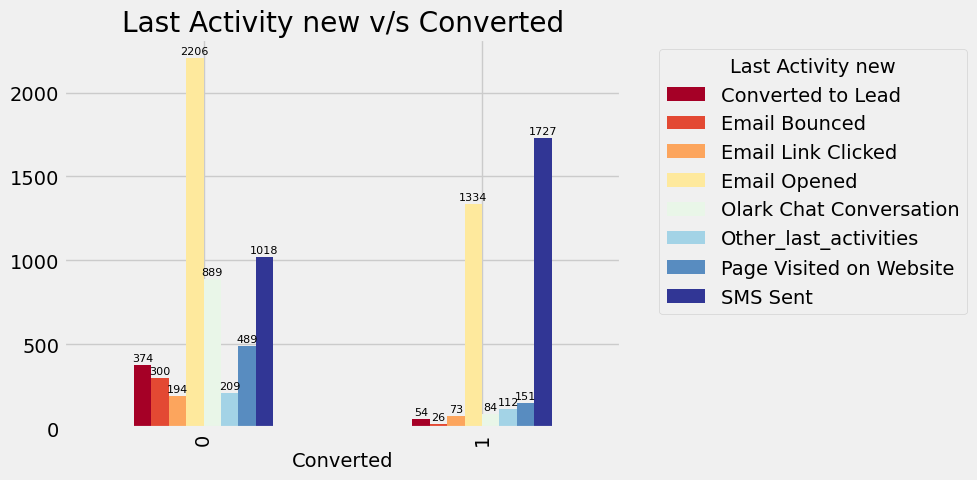

Lead Origin new


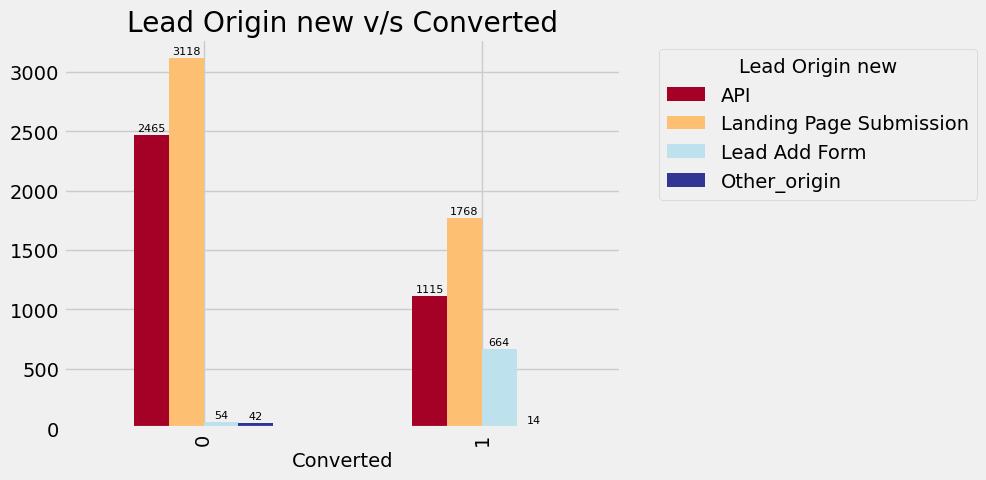

Last Notable Activity new


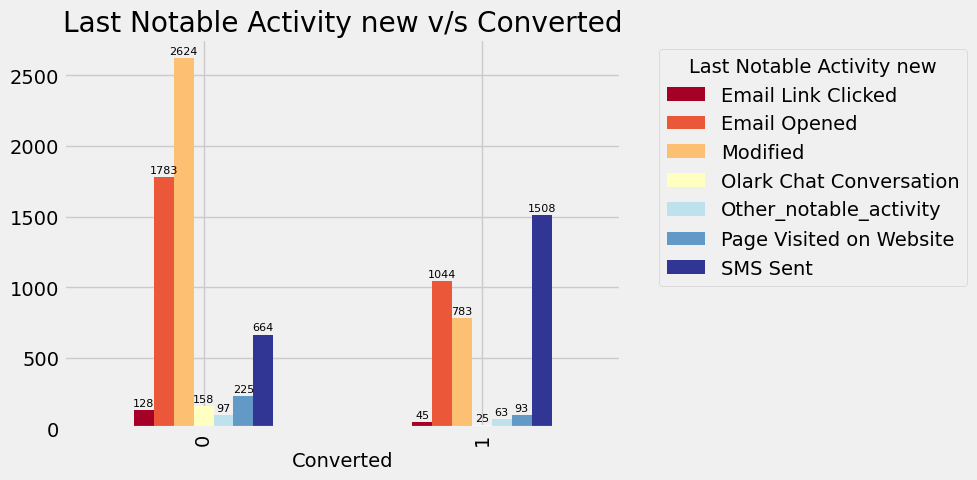

In [173]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'cat_cols' and 'leads1' are defined
for i in cat_cols:
    print("\033[1m" + i + "\033[0m")
    cross_table = pd.crosstab(leads1["Converted"], leads1[i])
    ax = cross_table.plot(kind='bar', cmap='RdYlBu')
    plt.title(f"{i} v/s Converted")
    plt.legend(title=i, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add counts on the bars
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points',
                    fontsize=8)
    
    plt.show()

**From above plots, following important insights can be observed:**

1. Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement maximum of leads response remains same i.e. "No" irrespective of leads converting or not
2. Leads with do not email as "No" dont get converted mostly.
3. Leads with A free copy of Mastering The Interview as no dont get converted mostly.
4. Leads with Other specialization dont get converted mostly.
5. Working professional leads have high conversion rate.
6. Tags: Closed by horizon, lost to EINS, will revert after reading email have good conversion rates
7. Leads sourced from Reference, Welingak Website have good conversion rates.
8. Last activity email opened have very less conversion rate
9. Leads originating from lead add form have good conversion rates.
10. Leads having SMS sent as last notable activity have good conversion rates.

**Since for Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement maximum of leads response remains same i.e. "No" irrespective of leads converting or not, these variables do not add any information to our model and can be dropped** 

In [174]:
leads1.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1, inplace=True)

In [175]:
leads1.shape

(9240, 14)

### Numerical columns V/s Target column

TotalVisits


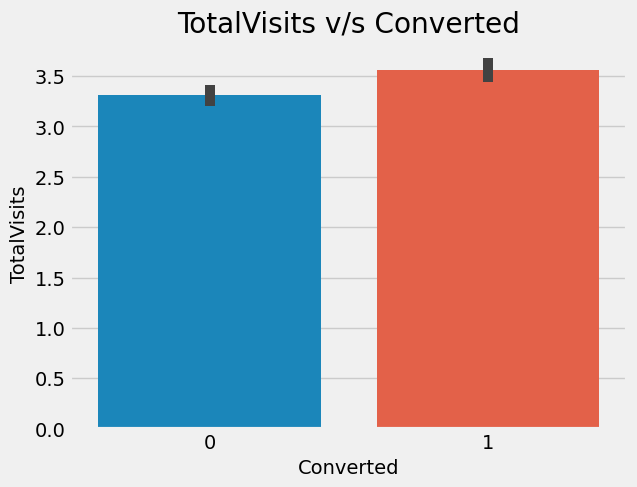

Total Time Spent on Website


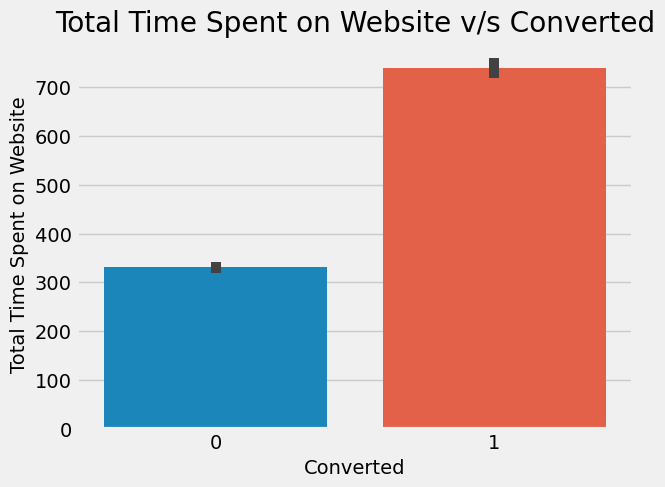

Page Views Per Visit


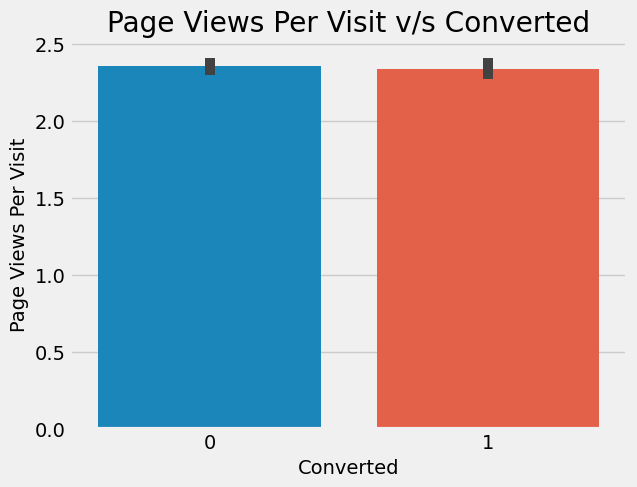

In [176]:
for i in num_cols:
    print("\033[1m" + i + "\033[0m")
    sns.barplot(leads1,x="Converted",y=i)
    plt.title(f"{i} v/s Converted")
    plt.show()

**From above plots, following inferences can be made**:

1. Converted leads are seen to have more total visits to website than non-converted
2. Leads spending more time on website have good conversion rates.
3. No major differnce between converted and non-converted leads based on page views per visit

## Multivariate Analysis

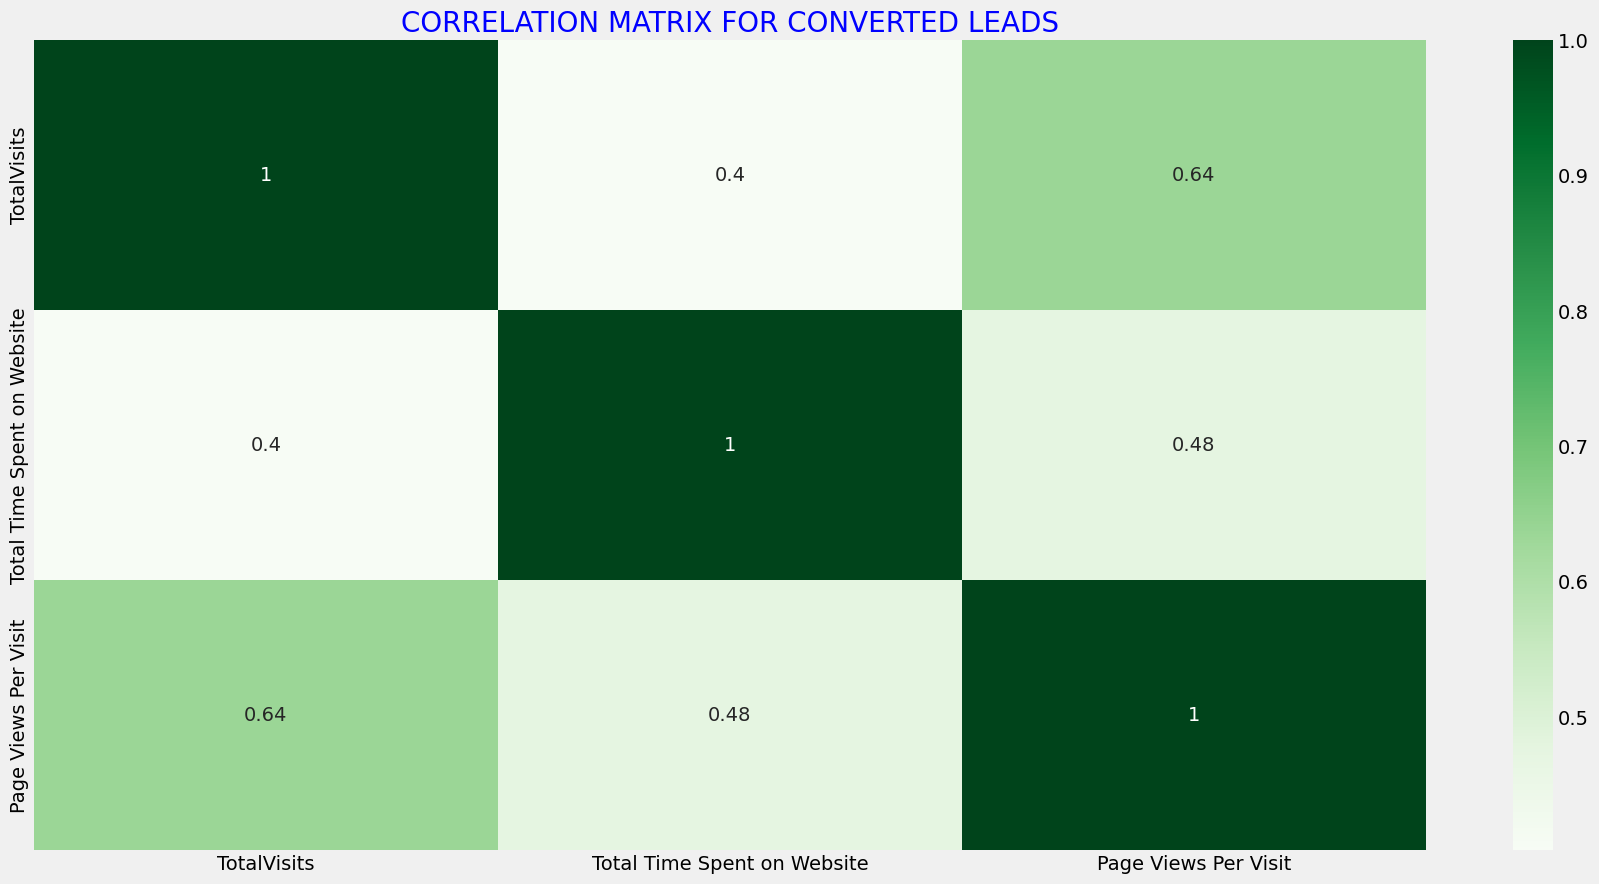

In [177]:
# Plotting heat map for converted leads
plt.figure(figsize=(20,10))
# Filtering out leads data with converted leads
leads_conv=leads1[leads1["Converted"]==1]
leads_conv.drop("Converted",axis=1,inplace=True)
sns.heatmap(leads_conv.corr(),annot=True,cmap="Greens")
plt.title("CORRELATION MATRIX FOR CONVERTED LEADS",fontdict={"fontsize":20,"fontweight":10,"color":"blue"})
plt.show()

**For Converted leads, page views per visit have fairly good correlation with total visits**

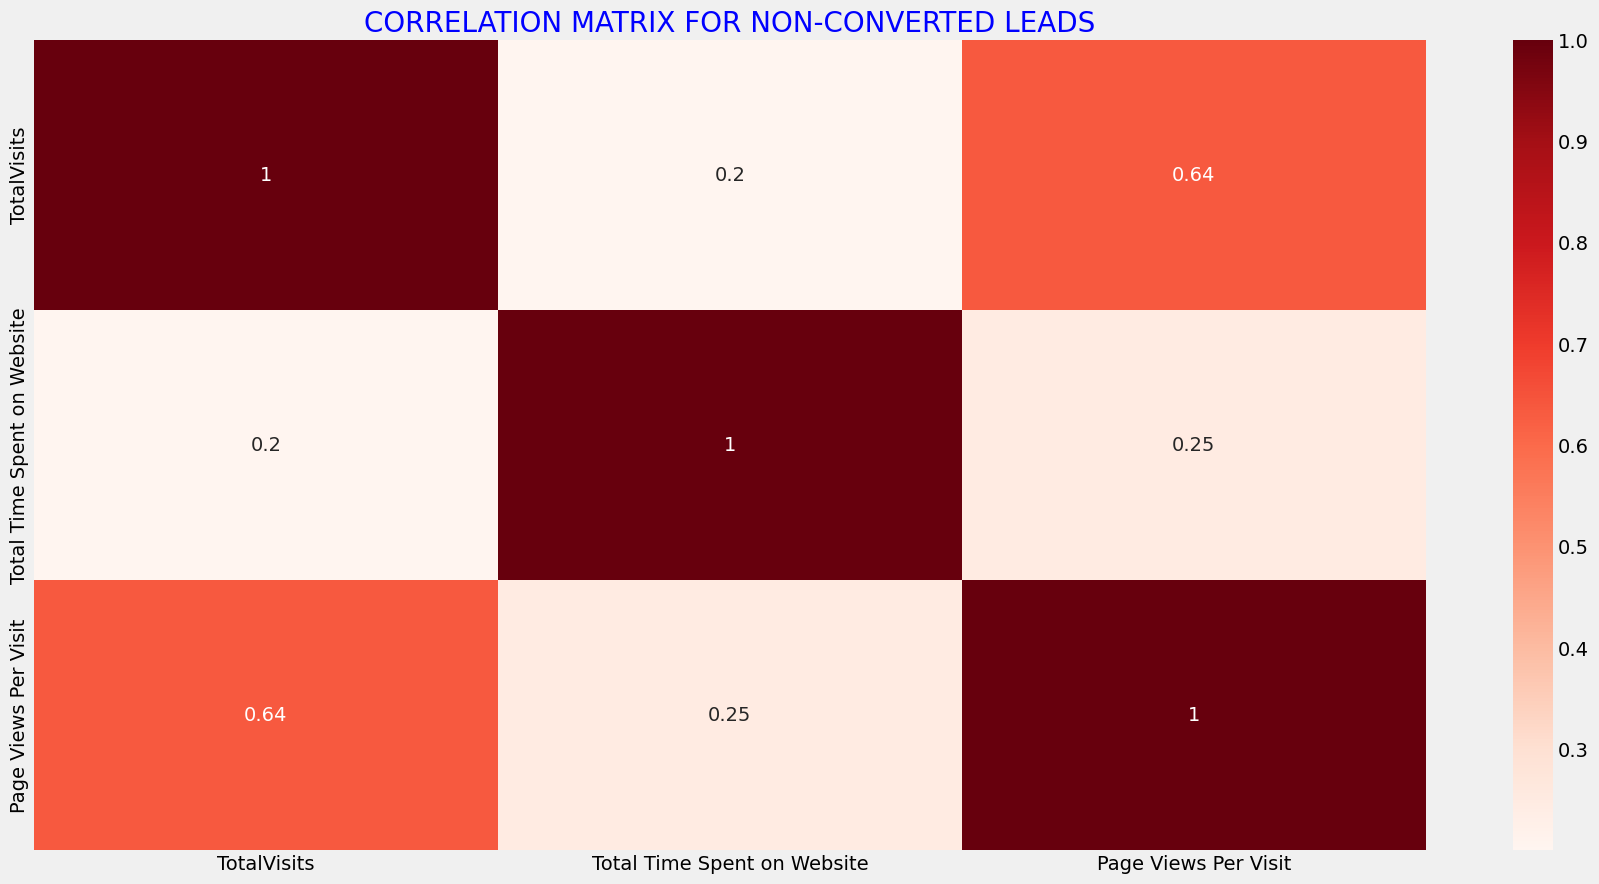

In [178]:
# Plotting heat map for non-converted leads
plt.figure(figsize=(20,10))
# Filtering out leads data with converted leads
leads_no_conv=leads1[leads1["Converted"]==0]
leads_no_conv.drop("Converted",axis=1,inplace=True)
sns.heatmap(leads_no_conv.corr(),annot=True,cmap="Reds")
plt.title("CORRELATION MATRIX FOR NON-CONVERTED LEADS",fontdict={"fontsize":20,"fontweight":10,"color":"blue"})
plt.show()

**Total time spent on website and total visits have fairl low correlation for non-converted leads**

In [179]:
## Checking for Data Imbalance
# Calculating the percentage of Converted leads
leads_conv= round(len(leads1[leads1["Converted"]==1])*100/len(leads1),2)
# Calculating the percentage of applicants with defaults
leads_non_conv= round(len(leads1[leads1["Converted"]==0])*100/len(leads1),2)
print(leads_conv)
print(leads_non_conv)

38.54
61.46


**Percentage of converted data is 38.54 and percentage of non-converted leads data is 61.46 which is not a major data imbalance and we can proceed with this**

In [180]:
# Checking the shape of dataset again
leads1.shape

(9240, 14)

## Data Preparation

In [181]:
# Mapping Yes to 1 and No to 0 for Binary categorical columns
# List of variables to map

varlist =  ["Do Not Email","A free copy of Mastering The Interview"]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads1[varlist] = leads1[varlist].apply(binary_map)

In [182]:
# Checking shape of dataset
leads1.shape

(9240, 14)

### categorical variables with multiple levels, create dummy features (one-hot encoded)

In [183]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads1[["Lead Origin new","Last Activity new","Last Notable Activity new","Lead Source new"]], drop_first=True)

# Adding the results to the master dataframe
leads1 = pd.concat([leads1, dummy1], axis=1)

In [184]:
# Checking shape of dataset
leads1.shape

(9240, 36)

In [185]:
# Creating dummy variables for the variable 'Specialization'
spec= pd.get_dummies(leads1["Specialization_new"], prefix='Specialization')
# Dropping Specialization_unknown column
spec1 = spec.drop(['Specialization_Unknown'], 1)
#Adding the results to the master dataframe
leads1 = pd.concat([leads1,spec1], axis=1)

In [186]:
# Creating dummy variables for the variable 'What is your current occupation 1'
occup= pd.get_dummies(leads1["What is your current occupation 1"], prefix='occup')
# Dropping Current_occup_Not_specified column
occup1 = occup.drop(['occup_Not_specified'], 1)
#Adding the results to the master dataframe
leads1 = pd.concat([leads1,occup1], axis=1)

In [187]:
# Creating dummy variables for the variable 'What matters most to you in choosing a course new'
select= pd.get_dummies(leads1["What matters most to you in choosing a course new"], prefix='Course_selection')
# Dropping Course_selection_Not_specified column
select1 = select.drop(['Course_selection_Not_specified'], 1)
#Adding the results to the master dataframe
leads1 = pd.concat([leads1,select1], axis=1)

In [188]:
# Creating dummy variables for the variable 'What matters most to you in choosing a course new'
tg= pd.get_dummies(leads1["Tags_new"], prefix='Tags')
# Dropping Course_selection_Not_specified column
tg1 = tg.drop(['Tags_Unknown'], 1)
#Adding the results to the master dataframe
leads1 = pd.concat([leads1,tg1], axis=1)

In [189]:
# Checking shape of dataset
leads1.shape

(9240, 62)

In [190]:
# Dropping the redundant column names
leads1.drop(["Lead Origin new","Last Activity new","Last Notable Activity new","Specialization_new","What is your current occupation 1","What matters most to you in choosing a course new","Tags_new","Lead Source new"],axis=1,inplace=True)

In [191]:
# Checking shape of dataset
leads1.shape

(9240, 54)

In [192]:
# Checking column names of dataset
leads1.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin new_Landing Page Submission',
       'Lead Origin new_Lead Add Form', 'Lead Origin new_Other_origin',
       'Last Activity new_Email Bounced',
       'Last Activity new_Email Link Clicked',
       'Last Activity new_Email Opened',
       'Last Activity new_Olark Chat Conversation',
       'Last Activity new_Other_last_activities',
       'Last Activity new_Page Visited on Website',
       'Last Activity new_SMS Sent', 'Last Notable Activity new_Email Opened',
       'Last Notable Activity new_Modified',
       'Last Notable Activity new_Olark Chat Conversation',
       'Last Notable Activity new_Other_notable_activity',
       'Last Notable Activity new_Page Visited on Website',
       'Last Notable Activity new_SMS Sent', 'Lead Source new_Google',
       'Lead Source new_Olark Chat', 'Lead Source new_Orga

## Train-Test Split

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
# Putting feature variable to X
X = leads1.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin new_Landing Page Submission,Lead Origin new_Lead Add Form,Lead Origin new_Other_origin,Last Activity new_Email Bounced,Last Activity new_Email Link Clicked,...,Course_selection_Other_reasons,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [195]:
# Putting response variable to y
y = leads1['Converted']

In [196]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=75)

## Feature Scaling

In [197]:
from sklearn.preprocessing import StandardScaler

In [198]:
# applying standardization scaling on numerical columns of data
scaler = StandardScaler()

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin new_Landing Page Submission,Lead Origin new_Lead Add Form,Lead Origin new_Other_origin,Last Activity new_Email Bounced,Last Activity new_Email Link Clicked,...,Course_selection_Other_reasons,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
7232,0,-0.373608,-0.744990,-0.173773,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4301,1,-0.634739,-0.289920,-0.657254,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5361,0,-0.895869,-0.889369,-1.140734,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3249,0,-0.373608,0.380805,-0.173773,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7606,0,-0.895869,-0.889369,-1.140734,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Looking for co-relations

In [199]:
# Calculating the correlations
correlations=X_train.corr()

# Getting the correlations
top_correlations = correlations.unstack().sort_values(ascending=False)

# Filtering out correlations = 1
top_correlations = top_correlations[top_correlations != 1]

# Droping NaN values
top_correlations = top_correlations.dropna()

# selecting top 10 correlations
top_10_correlations = top_correlations.head(10)

print(top_10_correlations)

Lead Source new_Reference                          Lead Origin new_Lead Add Form                        0.853816
Lead Origin new_Lead Add Form                      Lead Source new_Reference                            0.853816
Last Activity new_SMS Sent                         Last Notable Activity new_SMS Sent                   0.848267
Last Notable Activity new_SMS Sent                 Last Activity new_SMS Sent                           0.848267
Last Notable Activity new_Email Opened             Last Activity new_Email Opened                       0.844703
Last Activity new_Email Opened                     Last Notable Activity new_Email Opened               0.844703
Course_selection_Better Career Prospects           occup_Unemployed                                     0.790239
occup_Unemployed                                   Course_selection_Better Career Prospects             0.790239
Last Notable Activity new_Page Visited on Website  Last Activity new_Page Visited on Website    

**Above mentioned top 10 relations will be taken care by VIF and hence we will deal with them in model building stage**

## Feature Selection Using RFE

In [200]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [201]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)             # running RFE with 2- variables as output
rfe = rfe.fit(X_train, y_train)

In [202]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 28),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 29),
 ('A free copy of Mastering The Interview', False, 22),
 ('Lead Origin new_Landing Page Submission', False, 7),
 ('Lead Origin new_Lead Add Form', True, 1),
 ('Lead Origin new_Other_origin', False, 18),
 ('Last Activity new_Email Bounced', False, 6),
 ('Last Activity new_Email Link Clicked', False, 11),
 ('Last Activity new_Email Opened', False, 5),
 ('Last Activity new_Olark Chat Conversation', False, 9),
 ('Last Activity new_Other_last_activities', False, 3),
 ('Last Activity new_Page Visited on Website', False, 14),
 ('Last Activity new_SMS Sent', True, 1),
 ('Last Notable Activity new_Email Opened', False, 21),
 ('Last Notable Activity new_Modified', True, 1),
 ('Last Notable Activity new_Olark Chat Conversation', True, 1),
 ('Last Notable Activity new_Other_notable_activity', False, 4),
 ('Last Notable Activity new_Page Visited on Website', Fals

In [203]:
# Checking columns supported by RFE algorithm
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin new_Lead Add Form', 'Last Activity new_SMS Sent',
       'Last Notable Activity new_Modified',
       'Last Notable Activity new_Olark Chat Conversation',
       'Last Notable Activity new_SMS Sent', 'Lead Source new_Olark Chat',
       'Lead Source new_Welingak Website', 'Specialization_Travel and Tourism',
       'occup_Working Professional',
       'Course_selection_Better Career Prospects', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

## Model 1

In [204]:
import statsmodels.api as sm

In [205]:
# Adding a constant variable
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()) # Running the logistic model
res1 = logm1.fit()
print(res1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1065.5
Date:                Tue, 21 Nov 2023   Deviance:                       2131.0
Time:                        09:37:26   Pearson chi2:                 1.04e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6340
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [206]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [207]:
# Check for the VIF values of the feature variables.
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Course_selection_Better Career Prospects,8.45
6,Last Notable Activity new_SMS Sent,6.15
3,Last Activity new_SMS Sent,5.85
18,Tags_Will revert after reading the email,3.72
17,Tags_Ringing,2.42
4,Last Notable Activity new_Modified,1.96
2,Lead Origin new_Lead Add Form,1.87
16,Tags_Other_tags,1.85
13,Tags_Closed by Horizzon,1.64
14,Tags_Interested in other courses,1.63


**Since Specialization_Travel and Tourism has highest p-value more than 0.05 hence we need to drop it since it has become insignificant**

## Model 2

In [208]:
col = col.drop('Specialization_Travel and Tourism', 1)

In [209]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1067.4
Date:                Tue, 21 Nov 2023   Deviance:                       2134.8
Time:                        09:37:36   Pearson chi2:                 1.03e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6338
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [210]:
# Checking VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Course_selection_Better Career Prospects,8.45
6,Last Notable Activity new_SMS Sent,6.15
3,Last Activity new_SMS Sent,5.85
17,Tags_Will revert after reading the email,3.71
16,Tags_Ringing,2.42
4,Last Notable Activity new_Modified,1.95
2,Lead Origin new_Lead Add Form,1.87
15,Tags_Other_tags,1.85
12,Tags_Closed by Horizzon,1.64
13,Tags_Interested in other courses,1.63


**Since p-values of all variables are less than 0.05, we will check the VIF values, since VIF of Course_selection_Better Career Prospects is highest and >5, hence we need to drop it to avoid multicolinearity**

## Model 3

In [211]:
col = col.drop('Course_selection_Better Career Prospects', 1)

In [212]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1204.4
Date:                Tue, 21 Nov 2023   Deviance:                       2408.8
Time:                        09:37:40   Pearson chi2:                 1.01e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6179
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [213]:
# Checking VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Notable Activity new_SMS Sent,6.09
3,Last Activity new_SMS Sent,5.84
4,Last Notable Activity new_Modified,1.94
2,Lead Origin new_Lead Add Form,1.86
16,Tags_Will revert after reading the email,1.81
7,Lead Source new_Olark Chat,1.46
1,Total Time Spent on Website,1.40
9,occup_Working Professional,1.35
8,Lead Source new_Welingak Website,1.33
11,Tags_Closed by Horizzon,1.32


**Since p-values of all variables are less than 0.05, we will check the VIF values, since VIF of Last Notable Activity new_SMS Sent is highest and >5, hence we need to drop it to avoid multicolinearity**

## Model 4

In [214]:
col = col.drop('Last Notable Activity new_SMS Sent', 1)

In [215]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
print(res4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1211.9
Date:                Tue, 21 Nov 2023   Deviance:                       2423.7
Time:                        09:37:46   Pearson chi2:                 1.02e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6171
Covariance Type:            nonrobust                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [216]:
# Checking VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin new_Lead Add Form,1.86
15,Tags_Will revert after reading the email,1.76
4,Last Notable Activity new_Modified,1.56
3,Last Activity new_SMS Sent,1.45
6,Lead Source new_Olark Chat,1.42
1,Total Time Spent on Website,1.40
8,occup_Working Professional,1.35
10,Tags_Closed by Horizzon,1.32
7,Lead Source new_Welingak Website,1.32
11,Tags_Interested in other courses,1.12


**Since p-values of all variables are <=0.05 and VIF is also <=5, hence the model 4 is our final model and we can proceed with it**

In [217]:
# Getting the predicted values on the train set
y_train_pred = res4.predict(X_train_sm)

In [218]:
y_train_pred = y_train_pred.values.reshape(-1)

In [219]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.001373,7232
1,0,0.033614,4301
2,1,0.182798,5361
3,1,0.995070,3249
4,1,0.748076,7606


In [220]:
from sklearn import metrics

In [221]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [222]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

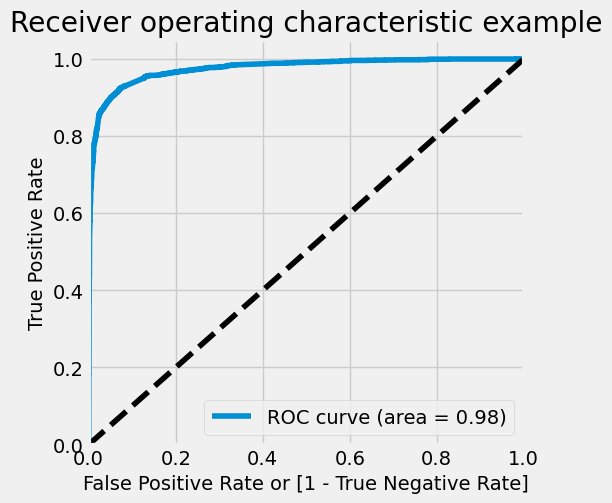

In [223]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

**The ROC curve is hugging the top-left corner of the graph, indicating high sensitivity (True Positive Rate) and low false positive rate simultaneously. Also AUC is 0.98 which is near to ideal value of 1.**


## Finding optimum cutt off point using sensitivity-specificity

In [224]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001373,7232,1,0,0,0,0,0,0,0,0,0
1,0,0.033614,4301,1,0,0,0,0,0,0,0,0,0
2,1,0.182798,5361,1,1,0,0,0,0,0,0,0,0
3,1,0.995070,3249,1,1,1,1,1,1,1,1,1,1
4,1,0.748076,7606,1,1,1,1,1,1,1,1,0,0


In [225]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386827  1.000000  0.000000
0.1   0.1  0.842610  0.971623  0.761220
0.2   0.2  0.901361  0.954436  0.867877
0.3   0.3  0.926098  0.919664  0.930156
0.4   0.4  0.928726  0.904876  0.943772
0.5   0.5  0.930891  0.884892  0.959909
0.6   0.6  0.930118  0.863709  0.972012
0.7   0.7  0.918213  0.818545  0.981089
0.8   0.8  0.911101  0.794964  0.984367
0.9   0.9  0.892084  0.737010  0.989914


In [226]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

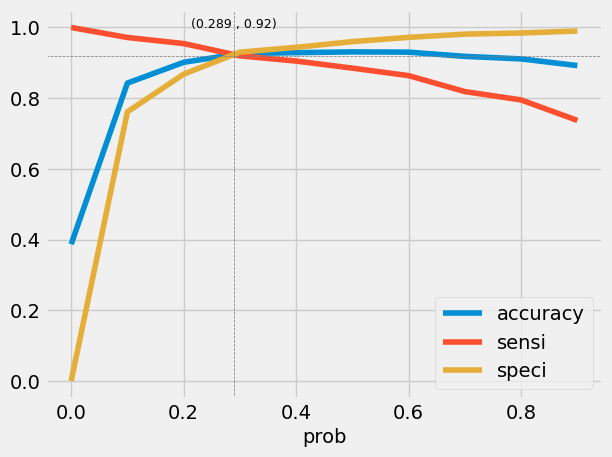

In [227]:
# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.3)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.3)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

In [228]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.289 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.001373,7232,1,0,0,0,0,0,0,0,0,0,0
1,0,0.033614,4301,1,0,0,0,0,0,0,0,0,0,0
2,1,0.182798,5361,1,1,0,0,0,0,0,0,0,0,0
3,1,0.995070,3249,1,1,1,1,1,1,1,1,1,1,1
4,1,0.748076,7606,1,1,1,1,1,1,1,1,0,0,1


In [229]:
# Assigning lead score to train data by multiplying converted prob with 100
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [230]:
y_train_pred_final[['Converted','Converted_Prob','Prospect ID','predicted','Lead_Score']].head()

,Converted,Converted_Prob,Prospect ID,predicted,Lead_Score
0,0,0.001373,7232,0,0
1,0,0.033614,4301,0,3
2,1,0.182798,5361,0,18
3,1,0.995070,3249,1,100
4,1,0.748076,7606,1,75


In [231]:
from sklearn import metrics

In [232]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3687  279]
 [ 193 2309]]


In [233]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [234]:
# Let's check the overall accuracy.
accuracy= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print("Accuracy of train data:",round(accuracy,4))

# Let's see the sensitivity of our logistic regression model
sensitivity= round(TP / float(TP+FN),4)
print("Sensitivity of train data:",sensitivity)

# Let us calculate specificity
specificity=round(TN / float(TN+FP),4)
print("Specificity of train data:",specificity)

# Calculate false postive rate - predicting converted when lead should not be converted
FPR=round(FP/ float(TN+FP),4)
print("False positive rate of Train Data:", FPR)

# Calculate false negative rate - predicting not converted when lead should be converted
FNR=round(FN/ float(FN+TP),4)
print("False negative rate of Train Data:", FNR)

# Lets calculate Precision of train data
precision = round(TP/(TP+FP),4)
print("Precision of Train Data:", precision)

# lets calculate recall of train data
recall = round(TP/(TP+FN),4)
print("Recall of Train Data:", recall)

Accuracy of train data: 0.927
Sensitivity of train data: 0.9229
Specificity of train data: 0.9297
False positive rate of Train Data: 0.0703
False negative rate of Train Data: 0.0771
Precision of Train Data: 0.8922
Recall of Train Data: 0.9229


## Precison an Recall Tradeoff

In [235]:
from sklearn.metrics import precision_recall_curve

In [236]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 6463    0
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [237]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [238]:
# Now let's calculate accuracy, sensitivity, specificity, precision, and recall for various probability cutoffs.
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy','precision', 'recall'])
from sklearn.metrics import confusion_matrix

# Assuming you have y_train_pred_final with columns 'Converted' and other probability columns
num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    
    accuracy = (cm1[0, 0] + cm1[1, 1]) / total1
    precision = cm1[1, 1] / (cm1[0, 1] + cm1[1, 1])  # Precision = TP / (TP + FP)
    recall = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    
    cutoff_df.loc[i] = [i, accuracy, precision, recall]

print(cutoff_df)


     prob  accuracy  precision    recall
0.0   0.0  0.386827   0.386827  1.000000
0.1   0.1  0.842610   0.719657  0.971623
0.2   0.2  0.901361   0.820055  0.954436
0.3   0.3  0.926098   0.892552  0.919664
0.4   0.4  0.928726   0.910334  0.904876
0.5   0.5  0.930891   0.932996  0.884892
0.6   0.6  0.930118   0.951144  0.863709
0.7   0.7  0.918213   0.964673  0.818545
0.8   0.8  0.911101   0.969771  0.794964
0.9   0.9  0.892084   0.978769  0.737010


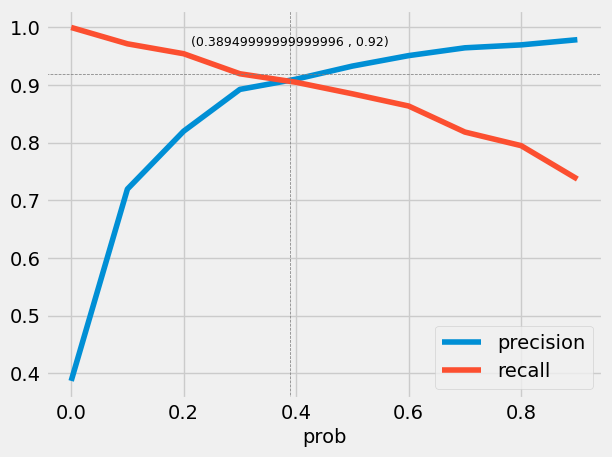

In [239]:
# Finding the intersection points of the precision and accuracy curves
precision_interp = interp1d(cutoff_df['prob'], cutoff_df['precision'], kind='linear')
intersection_3 = np.round(float(fsolve(lambda x: precision_interp(x) - acc_interp(x), 0.4)), 3)

# Finding the intersection points of the recall and accuracy curves
recall_interp = interp1d(cutoff_df['prob'], cutoff_df['recall'], kind='linear')
intersection_4 = np.round(float(fsolve(lambda x: recall_interp(x) - acc_interp(x), 0.4)), 3)

# Calculate the average of the two intersection points
intersection_x_recall_precision = (intersection_3 + intersection_4) / 2

# Interpolate the accuracy, precision, and recall at the intersection point
precision_at_intersection = np.round(float(precision_interp(intersection_x_recall_precision)), 2)
recall_at_intersection = np.round(float(recall_interp(intersection_x_recall_precision)), 2)

# Plot the four curves and add vertical and horizontal lines at the intersection point
cutoff_df.plot.line(x='prob', y=['precision', 'recall'])
plt.axvline(x=intersection_x_recall_precision, color='grey', linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey', linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates
plt.annotate(f'({intersection_x_recall_precision} , {accuracy_at_intersection})',
             xy=(intersection_x_recall_precision, accuracy_at_intersection),
             xytext=(0, 20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()


In [240]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.389 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead_Score
0,0,0.001373,7232,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.033614,4301,1,0,0,0,0,0,0,0,0,0,0,3
2,1,0.182798,5361,1,1,0,0,0,0,0,0,0,0,0,18
3,1,0.995070,3249,1,1,1,1,1,1,1,1,1,1,1,100
4,1,0.748076,7606,1,1,1,1,1,1,1,1,0,0,1,75


In [241]:
# Confusion matrix 
confusion_pr = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion_pr)

[[3733  233]
 [ 232 2270]]


In [242]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9281076066790352


In [243]:
TP = confusion_pr[1,1] # true positive 
TN = confusion_pr[0,0] # true negatives
FP = confusion_pr[0,1] # false positives
FN = confusion_pr[1,0] # false negatives

In [244]:
# Let's check the overall accuracy.
accuracy= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print("Accuracy of train data:",round(accuracy,4))

# Let's see the sensitivity of our logistic regression model
sensitivity= round(TP / float(TP+FN),4)
print("Sensitivity of train data:",sensitivity)

# Let us calculate specificity
specificity=round(TN / float(TN+FP),4)
print("Specificity of train data:",specificity)

# Calculate false postive rate - predicting converted when lead should not be converted
FPR=round(FP/ float(TN+FP),4)
print("False positive rate of Train Data:", FPR)

# Calculate false negative rate - predicting not converted when lead should be converted
FNR=round(FN/ float(FN+TP),4)
print("False negative rate of Train Data:", FNR)

# Lets calculate Precision of train data
precision = round(TP/(TP+FP),4)
print("Precision of Train Data:", precision)

# lets calculate recall of train data
recall = round(TP/(TP+FN),4)
print("Recall of Train Data:", recall)

Accuracy of train data: 0.9281
Sensitivity of train data: 0.9073
Specificity of train data: 0.9413
False positive rate of Train Data: 0.0587
False negative rate of Train Data: 0.0927
Precision of Train Data: 0.9069
Recall of Train Data: 0.9073


**For our problem statement sensitivity/Recall is important metrics , hence we choose 0.289 cut off since with it our sensitivity/recall are maximum**

## Making predictions on the test set

In [245]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin new_Landing Page Submission,Lead Origin new_Lead Add Form,Lead Origin new_Other_origin,Last Activity new_Email Bounced,Last Activity new_Email Link Clicked,...,Course_selection_Other_reasons,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
4861,0,0.409782,-0.459886,1.276670,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6362,0,-0.112478,1.808152,-0.173773,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3096,0,-0.895869,-0.889369,-1.140734,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
689,0,-0.373608,-0.545783,-0.173773,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4386,0,-0.895869,-0.889369,-1.140734,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [246]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin new_Lead Add Form,Last Activity new_SMS Sent,Last Notable Activity new_Modified,Last Notable Activity new_Olark Chat Conversation,Lead Source new_Olark Chat,Lead Source new_Welingak Website,occup_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
4861,0,-0.459886,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6362,0,1.808152,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3096,0,-0.889369,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
689,0,-0.545783,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4386,0,-0.889369,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [247]:
X_test_sm = sm.add_constant(X_test)

In [248]:
y_test_pred = res4.predict(X_test_sm)

In [249]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [250]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [251]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [252]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [253]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [254]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4861,0.479823
1,1,6362,0.998862
2,0,3096,0.044848
3,1,689,0.622070
4,1,4386,0.971160


In [255]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [256]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [257]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4861,1,0.479823
1,6362,1,0.998862
2,3096,0,0.044848
3,689,1,0.622070
4,4386,1,0.971160


In [258]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.289 else 0)

In [259]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4861,1,0.479823,1
1,6362,1,0.998862,1
2,3096,0,0.044848,0
3,689,1,0.622070,1
4,4386,1,0.971160,1


In [260]:
# Assigning lead score to test data by multiplying converted prob with 100
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [261]:
y_pred_final[['Prospect ID','Converted','Converted_Prob','final_predicted','Lead_Score']].head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4861,1,0.479823,1,48
1,6362,1,0.998862,1,100
2,3096,0,0.044848,0,4
3,689,1,0.622070,1,62
4,4386,1,0.971160,1,97


In [262]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1587,  126],
       [  93,  966]], dtype=int64)

In [263]:
TP_test = confusion2[1,1] # true positive 
TN_test = confusion2[0,0] # true negatives
FP_test = confusion2[0,1] # false positives
FN_test = confusion2[1,0] # false negatives

In [264]:
# Let's check the overall accuracy.
accuracy_test= round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),4)
print("Accuracy of test data:",accuracy_test)

# Let's see the sensitivity of our logistic regression model
sensitivity_test= round(TP_test / float(TP_test+FN_test),4)
print("Sensitivity of test data:",sensitivity_test)

# Let us calculate specificity
specificity_test=round(TN_test / float(TN_test+FP_test),4)
print("Specificity of test data:",specificity_test)

# Calculate false postive rate - predicting converted when lead should not be converted
FPR_test=round(FP_test/ float(TN_test+FP_test),4)
print("False positive rate of Test Data:", FPR_test)

# Calculate false negative rate - predicting not converted when lead should be converted
FNR_test=round(FN_test/ float(FN_test+TP_test),4)
print("False negative rate of Train Data:", FNR_test)

# Lets calculate Precision of train data
precision_test = round(TP_test/(TP_test+FP_test),4)
print("Precision of Test Data:", precision_test)
# lets calculate recall of train data

recall_test = round(TP_test/(TP_test+FN_test),4)
print("Recall of Test Data:", recall_test)

Accuracy of test data: 0.921
Sensitivity of test data: 0.9122
Specificity of test data: 0.9264
False positive rate of Test Data: 0.0736
False negative rate of Train Data: 0.0878
Precision of Test Data: 0.8846
Recall of Test Data: 0.9122
